# Homework 1

**Course**: FFR120 - Simulation of Complex Systems

**Author**: Artur Gasparyan

**Assignment**: Homework 1 - Option 4

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [2]:
rng = np.random.default_rng()
save_file = True
framerate_fast = 10
framerate_medium = 5
framerate_slow = 2
gif_writer_fast = anim.PillowWriter(fps=framerate_fast)
gif_writer_medium = anim.PillowWriter(fps=framerate_medium)
gif_writer_slow = anim.PillowWriter(fps=framerate_slow)

## Exercise 4.1 

In [68]:
import math

def decimal_to_binary_array(dec, width):
    if width is None:
        if dec == 0:
            width = 1
        else:
            width = 1 + math.floor(math.log2(dec))
    
    array = np.zeros(shape=(width,), dtype='uint8')
    
    for i in range(width-1, -1, -1):
        dec, array[i] = divmod(dec, 2)

    return array


array([1, 1, 1, 1, 1], dtype=uint8)

In [3]:
def create_parent_generation(n_cells, rule_nr, rng):
    if rule_nr in (90, 30):
        parent_generation = np.zeros((n_cells,))
        parent_generation[n_cells//2] = 1
        
    else:
        parent_generation = rng.integers(0, 2, size=(n_cells,))
        
    return parent_generation


def create_grid_1d(rule_nr, n_cells, n_generations, rng):
    grid = np.zeros(shape=(n_generations, n_cells), dtype='uint8')
    grid[0, :] = create_parent_generation(n_cells, rule_nr, rng) 
    return grid


def decode_1d_rule(rule_number):
    binary_numbers = [
        (1, 1, 1), (1, 1, 0), (1, 0, 1), (1, 0, 0),
        (0, 1, 1), (0, 1, 0), (0, 0, 1), (0, 0, 0)
    ]

    rule = dict()
    num = rule_number
    for i in range(8):
        num, rem = divmod(num, 2)
        rule[binary_numbers[-i-1]] = rem

    return rule


def update_grid_1d(grid, n_cells, rules, rng):
    grid = np.roll(grid, 1, 0)
    for i in range(1, n_cells-1):
        pattern = grid[1, i-1:i+2]
        grid[0, i] = rules[tuple(pattern)]

    left_pattern = np.zeros(shape=(3,))
    left_pattern[0] = grid[1, -1]
    left_pattern[1:] = grid[1, :2]

    right_pattern = np.zeros(shape=(3,))
    right_pattern[-1] = grid[1, 0]
    right_pattern[:2] = grid[1, -2:]

    grid[0, 0] = rules[tuple(left_pattern)]
    grid[0, -1] = rules[tuple(right_pattern)]

    return grid


In [4]:
def run_simulation_1d(n_cells, n_generations, rule_nr, rng):
    rules = decode_1d_rule(rule_number=rule_nr)
    grid = create_grid_1d(rule_nr, n_cells, n_generations, rng)
    history = []

    for gen in range(n_generations):
        grid = update_grid_1d(grid, n_cells, rules, rng)
        history.append(grid)

    return history


In [5]:
def render_grid(time, history, img):
    img.set_array(history[time])
    return img,


def create_animation(history, framerate):
    fig = plt.figure()
    img = plt.imshow(history[0], interpolation='none', animated=True)
    animation = anim.FuncAnimation(fig=fig, func=render_grid, frames=len(history), interval=1000/framerate, fargs=(history,img), blit=True)    
    return animation


def animate_simulation(name, history, framerate, writer, save_file):
    animation = create_animation(history, framerate)
    if save_file:
        animation.save(f"./gifs/{name}.gif", writer=writer)
        
    return animation
    

In [6]:
n_cells = 80
n_generations = 80

<IPython.core.display.Javascript object>


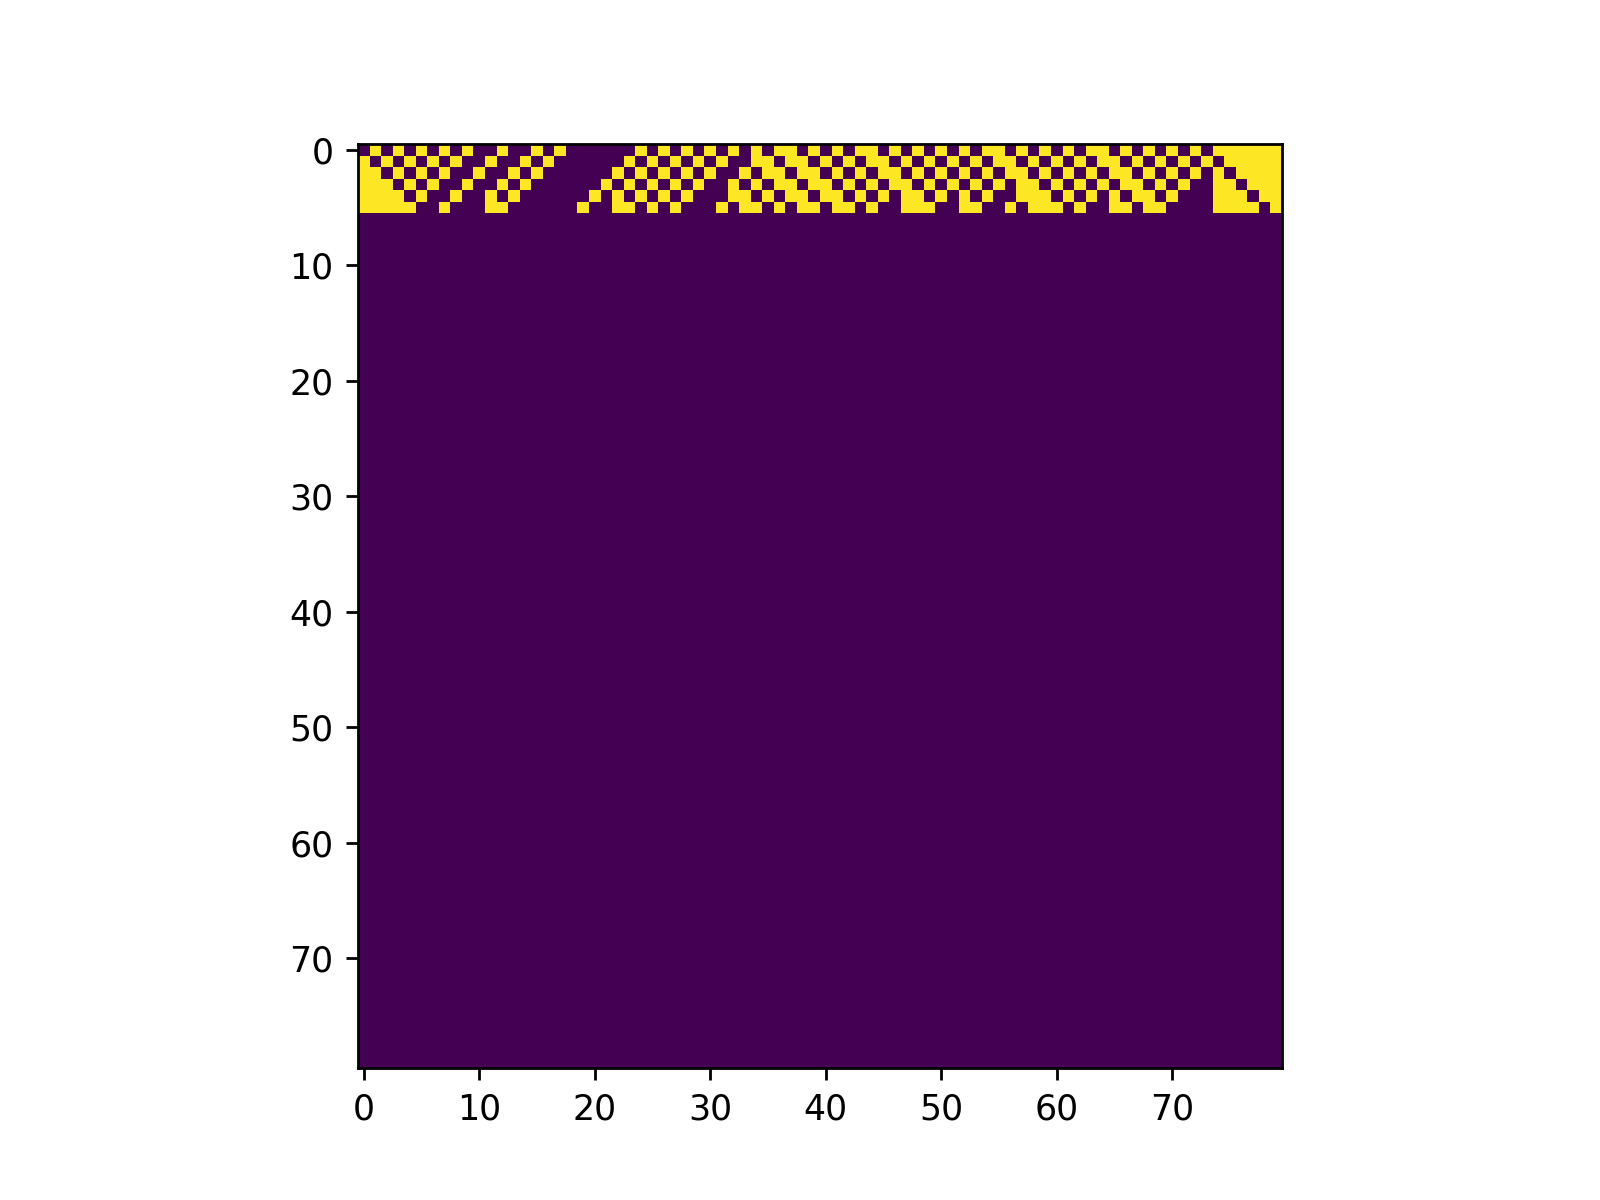

In [7]:
history_184 = run_simulation_1d(n_cells, n_generations, 184, rng)
animation_184 = animate_simulation("evolution-184", history_184, framerate_fast, gif_writer_fast, save_file)

<IPython.core.display.Javascript object>


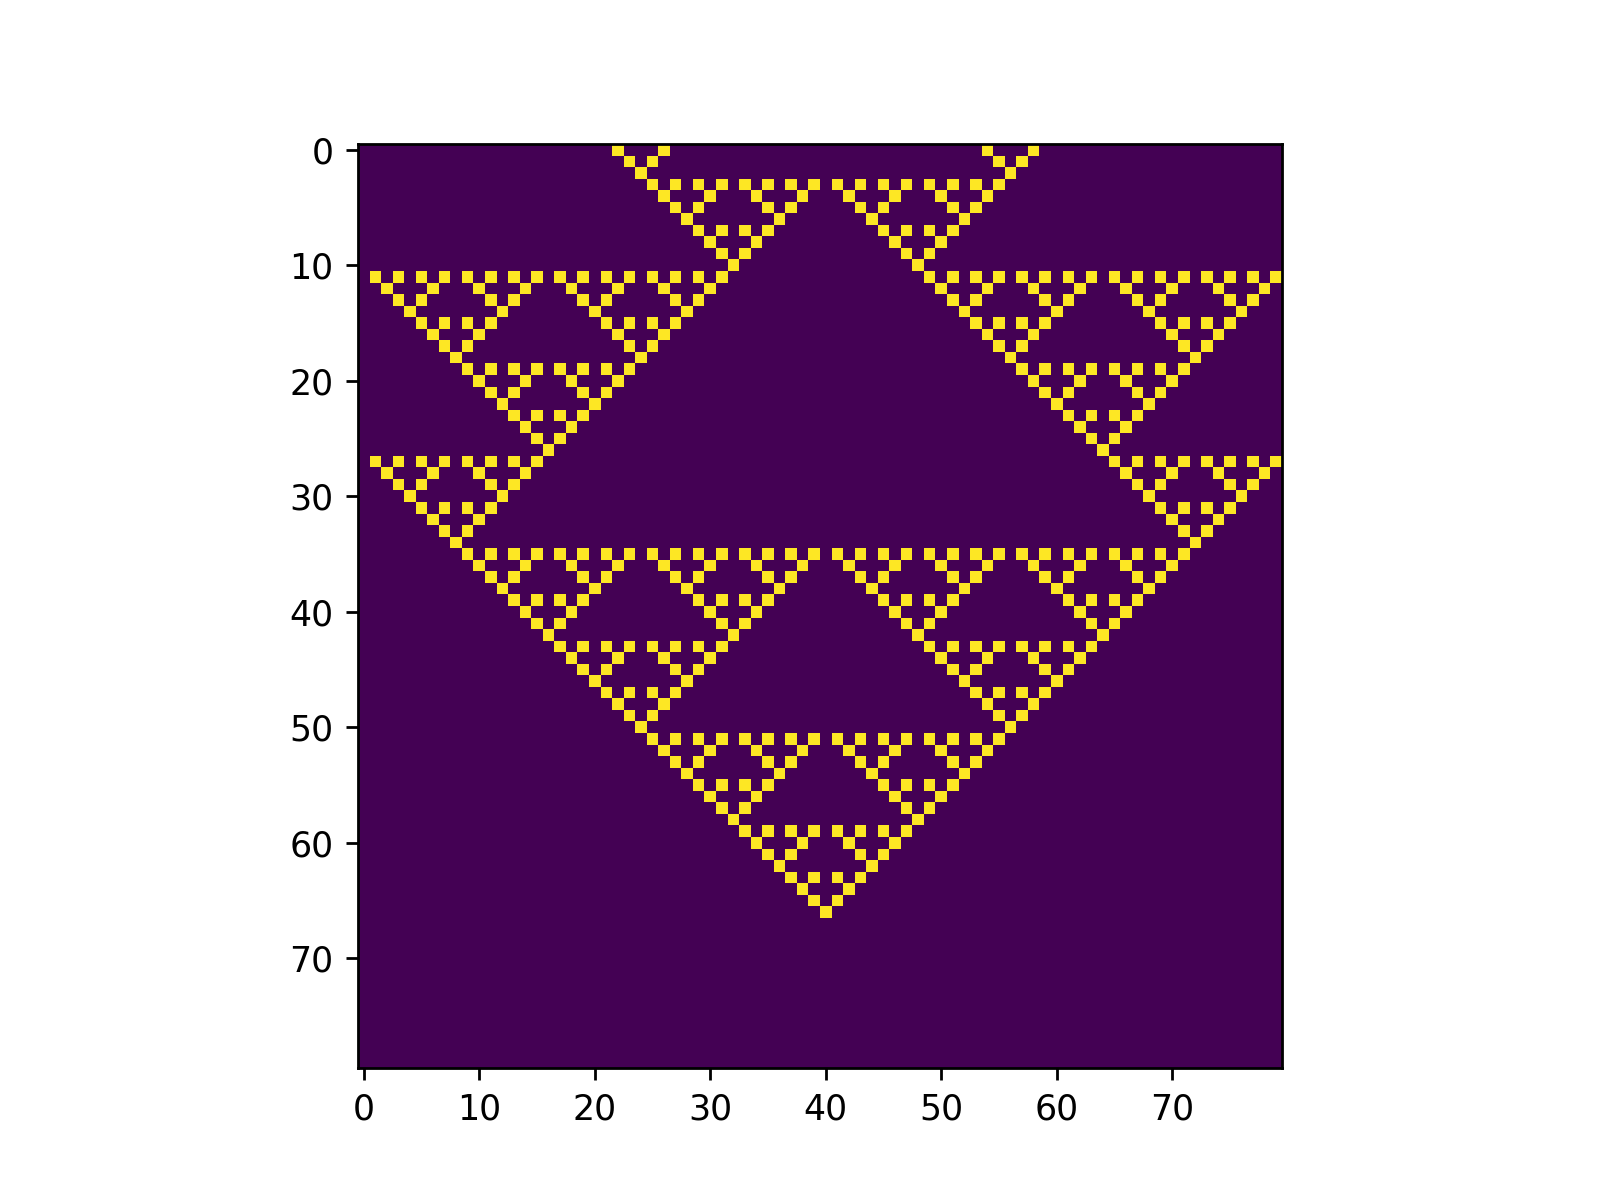

In [8]:
history_90 = run_simulation_1d(n_cells, n_generations, 90, rng)
animation_90 = animate_simulation("evolution-90", history_90, framerate_fast, gif_writer_fast, save_file)

<IPython.core.display.Javascript object>


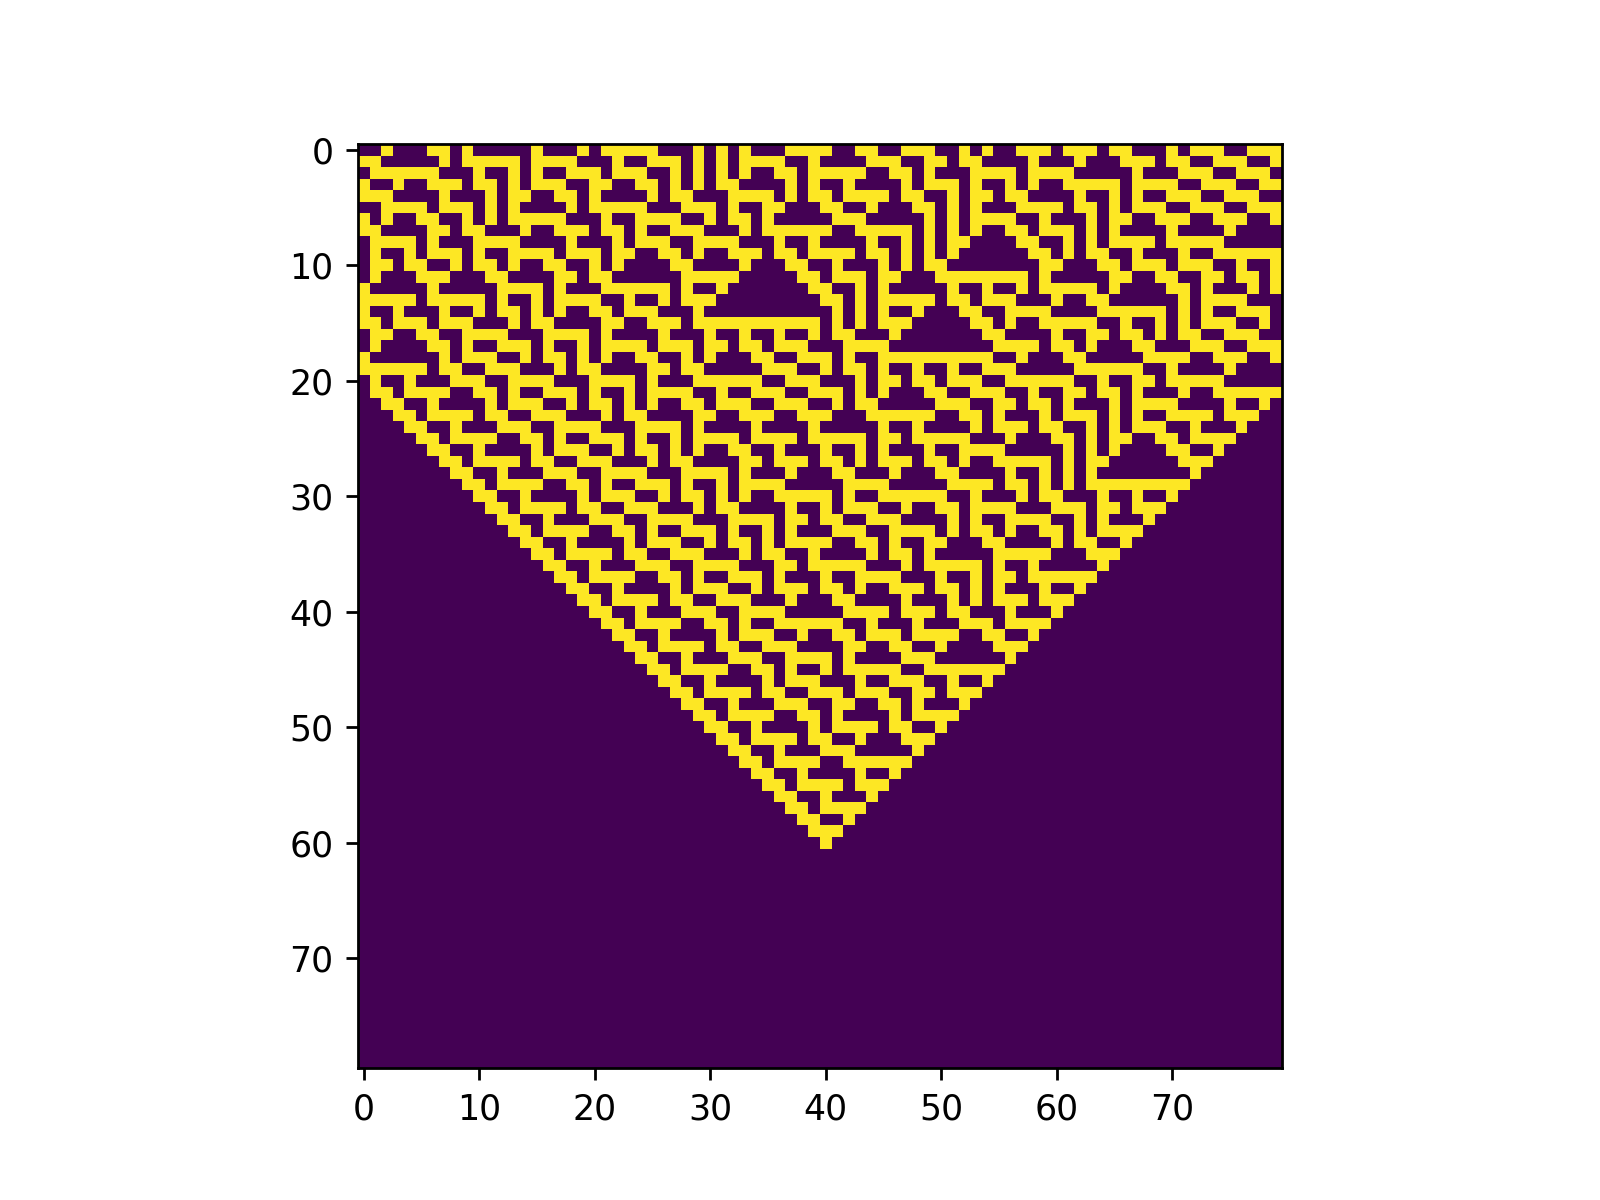

In [9]:
history_30 = run_simulation_1d(n_cells, n_generations, 30, rng)
animation_30 = animate_simulation("evolution-30", history_30, framerate_fast, gif_writer_fast, save_file)

<IPython.core.display.Javascript object>


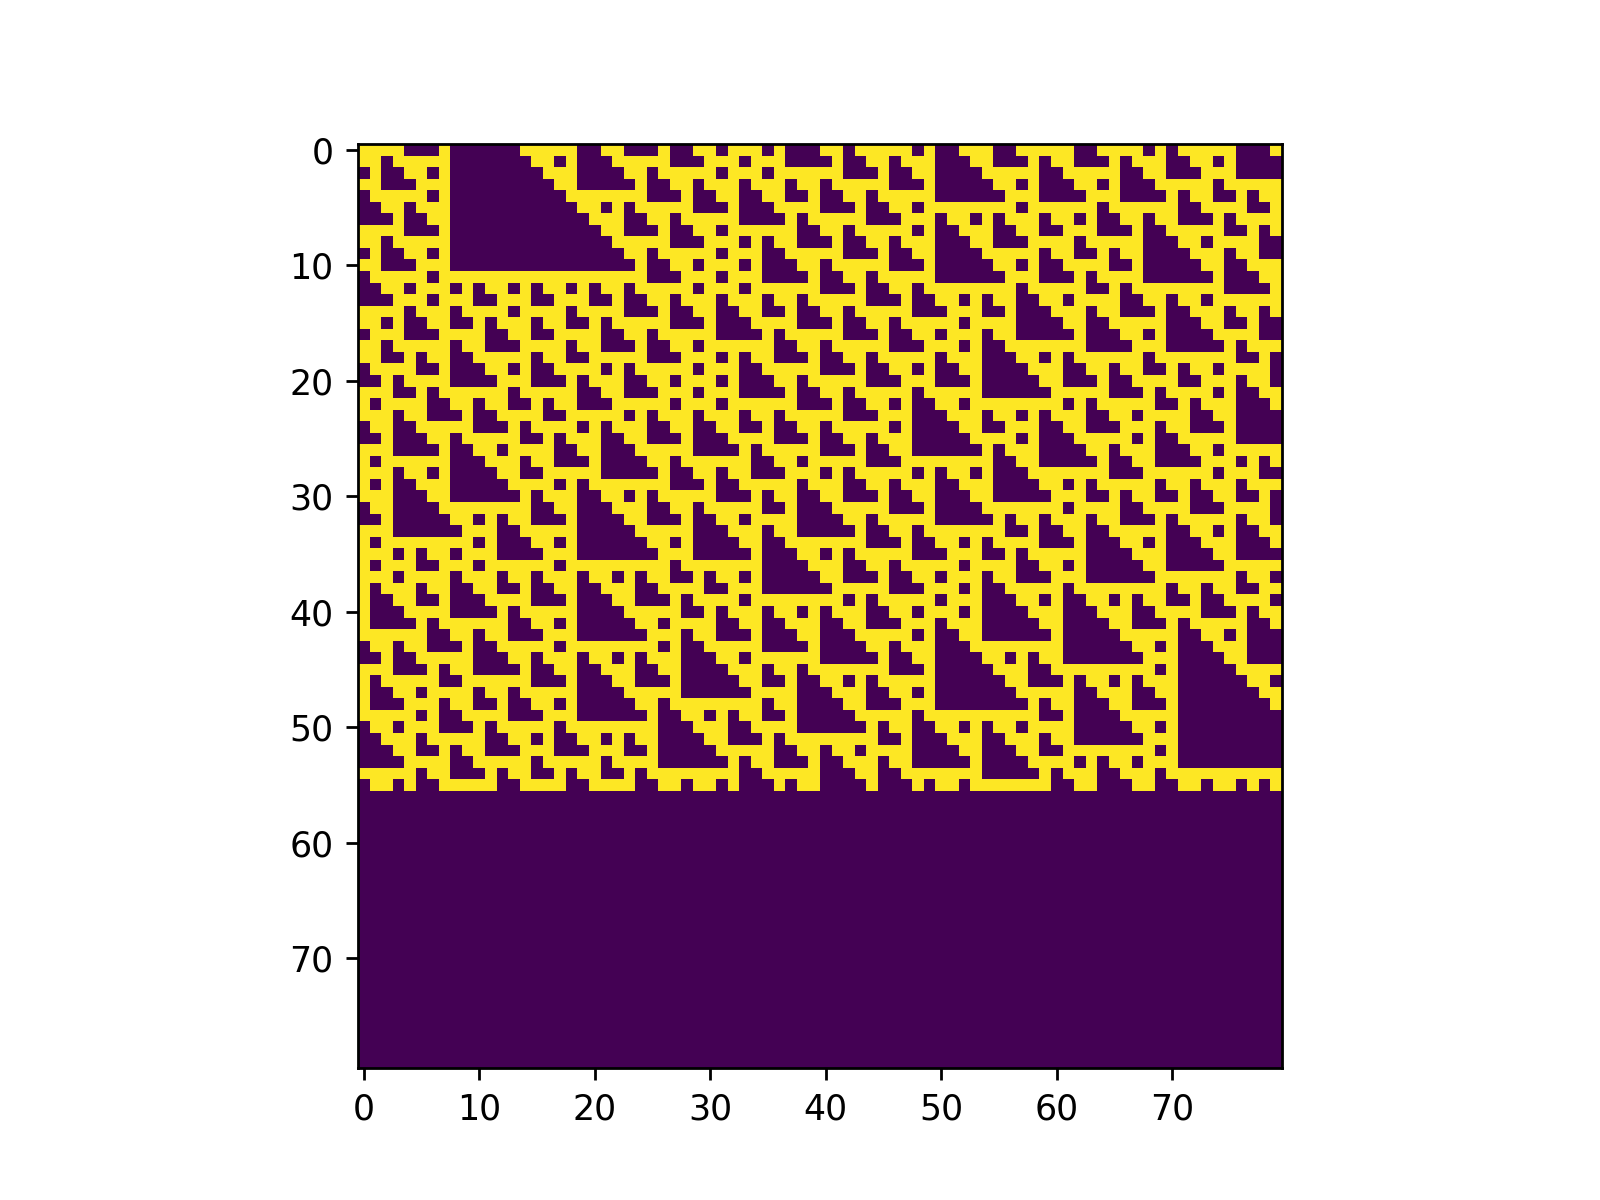

In [10]:
history_110 = run_simulation_1d(n_cells, n_generations, 110, rng)
animation_110 = animate_simulation("evolution-110", history_110, framerate_fast, gif_writer_fast, save_file)

<IPython.core.display.Javascript object>


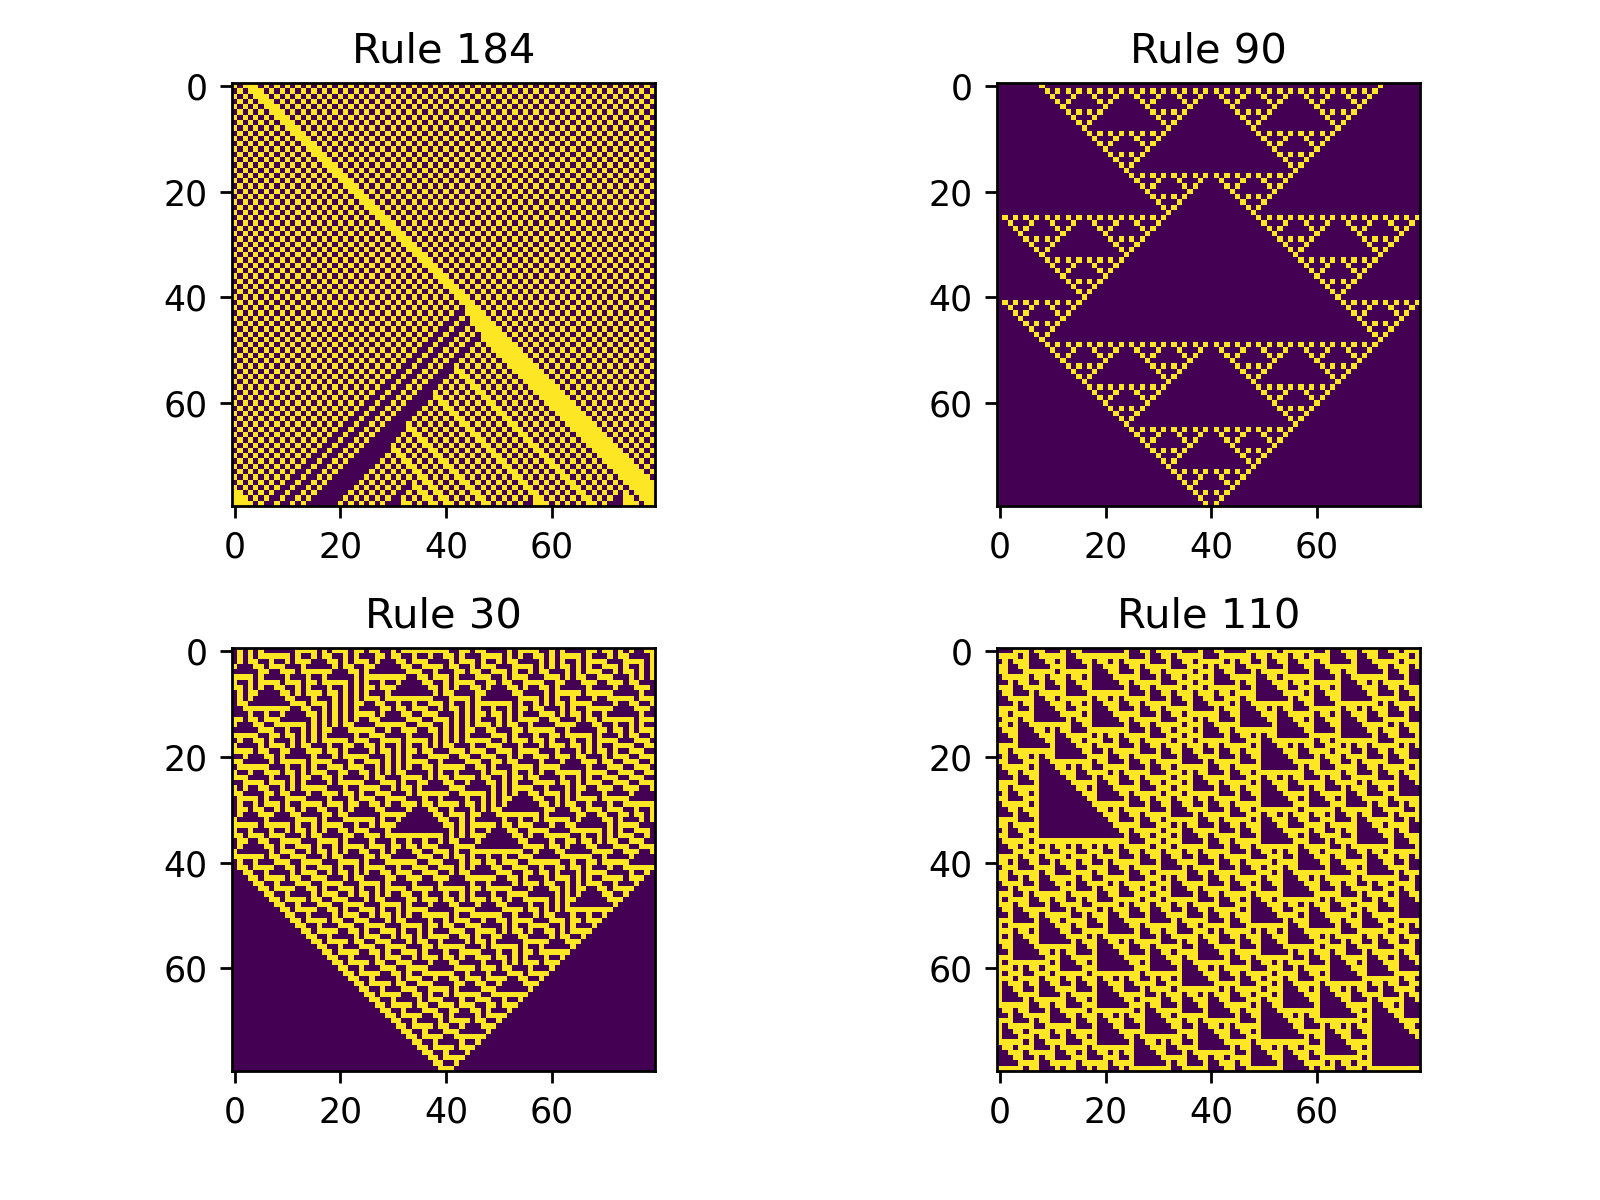

In [11]:
fig, axes = plt.subplots(2, 2)
histories = [history_184, history_90, history_30, history_110]
plt_names = ["Rule 184", "Rule 90", "Rule 30", "Rule 110"]
fig.tight_layout(pad=2)

for hist, ax, name in zip(histories, axes.flatten(), plt_names):
    ax.imshow(hist[-1])
    ax.set_title(name)
    

## Exercise 4.2

In [12]:
def create_grid(grid_size, rng):
    return rng.integers(0, 2, size=grid_size)


def get_nb_range(value, min, max, is_periodic_boundary):
    if value == min:
        if is_periodic_boundary:
            return max, min, min+1
        else:
            return min, min+1
        
    elif value == max:
        if is_periodic_boundary:
            return max-1, max, min
        else:
            return max-1, max
    
    else:
        return value-1, value, value+1
    

def enough_nbs_to_live(value, n_nbs):
    return n_nbs == 3 or (n_nbs == 2 and value)


def count_nbs(grid, grid_size, is_periodic_boundary):
    h, w = grid_size
    counts = np.zeros(shape=grid_size, dtype='uint8')
    
    for y in range(h):
        for x in range(w):
            xs = get_nb_range(x, 0, w-1, is_periodic_boundary)
            ys = get_nb_range(y, 0, h-1, is_periodic_boundary)
            nbgrid = np.ix_(ys, xs)

            value = grid[y, x]
            nbhood = grid[nbgrid]
            n_nbs = np.sum(nbhood) - value
            
            counts[y, x] = n_nbs
            
    return counts
            
            
def calculate_new_gen(grid, counts):
    return ((counts==3) | ((counts==2) & (grid==1))).astype('uint8')


def update_grid(grid, grid_size, is_periodic_boundary):
    counts = count_nbs(grid, grid_size, is_periodic_boundary)
    new_gen = calculate_new_gen(grid, counts)
    return new_gen


def run_simulation(initial_grid, n_generations, is_periodic_boundary):
    grid_size = initial_grid.shape
    grid = initial_grid
    history = [grid]
    
    for gen in range(1, n_generations):
        grid = update_grid(grid, grid_size, is_periodic_boundary)
        history.append(grid)
        
    return history

In [13]:
grid_size = 10, 10
n_generations = 20
initial_grid = create_grid(grid_size, rng)

<IPython.core.display.Javascript object>


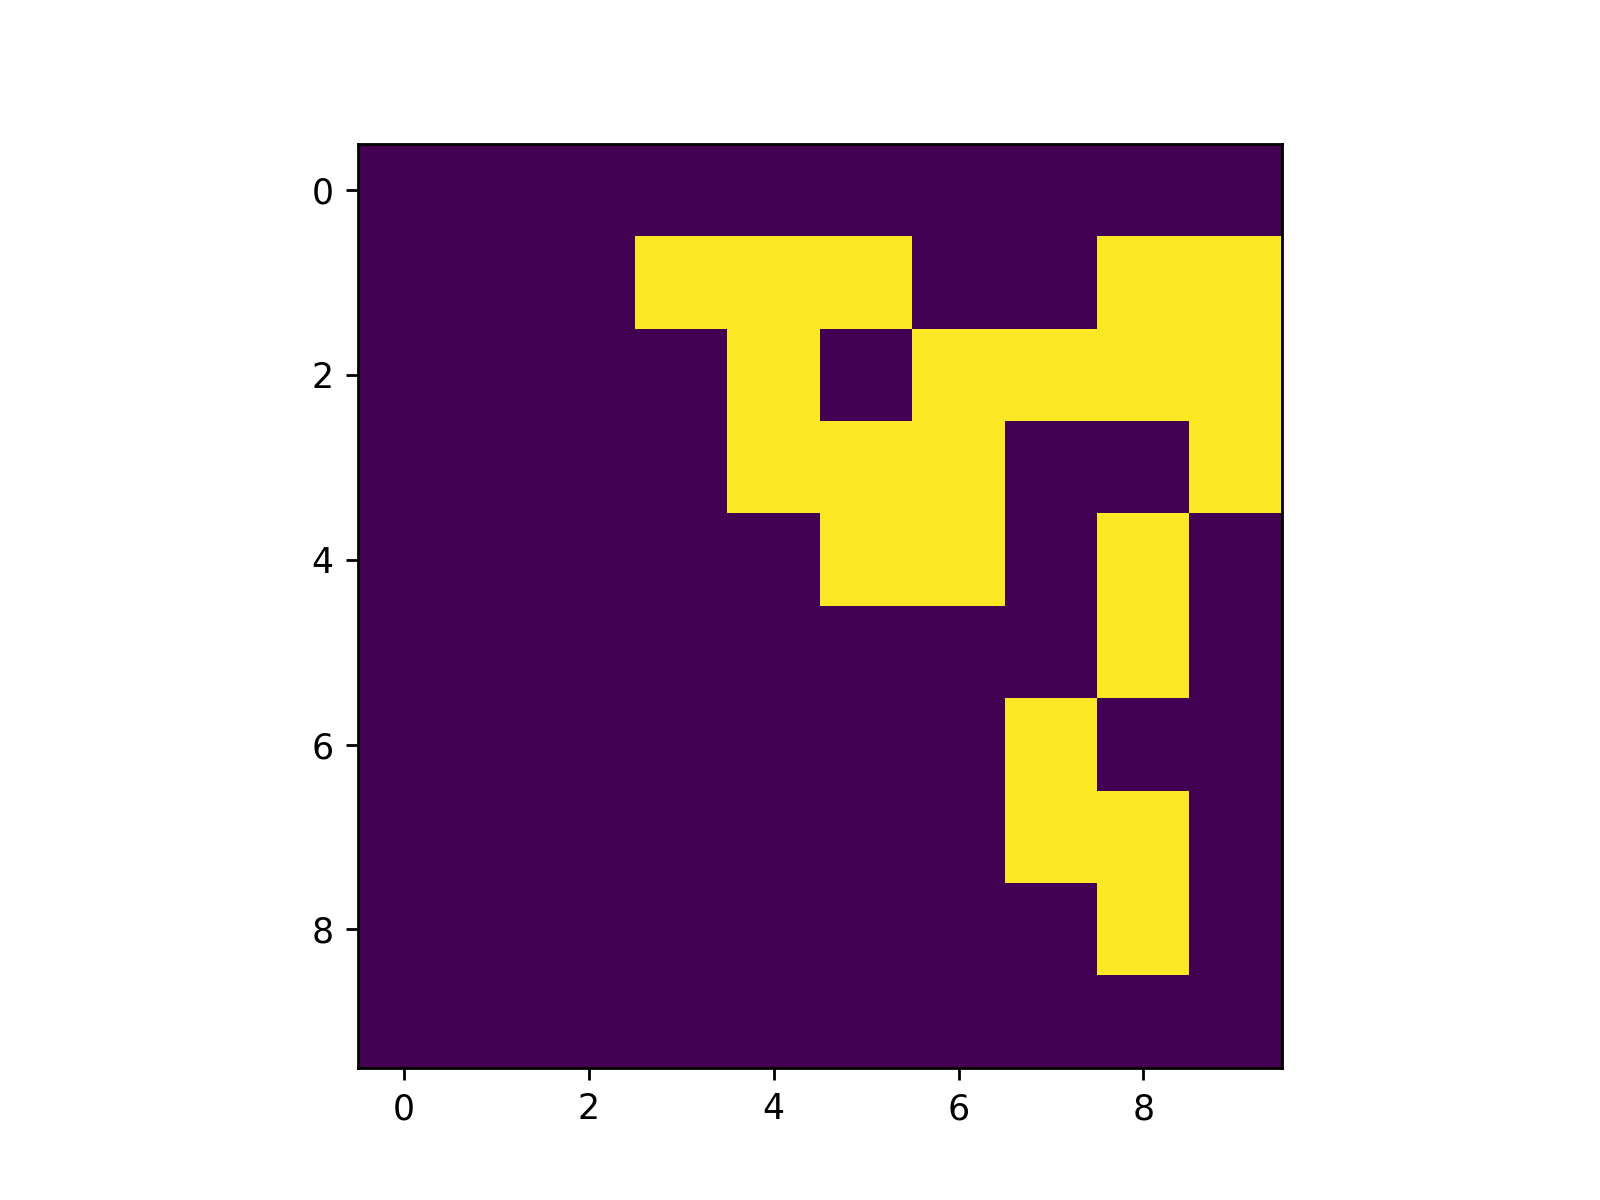

In [14]:
history_nonperiodic = run_simulation(initial_grid, n_generations, is_periodic_boundary=False)
animation_nonperiodic = animate_simulation(
    "evolution-nonperiodic", history_nonperiodic, framerate_medium, gif_writer_medium, save_file
)

<IPython.core.display.Javascript object>


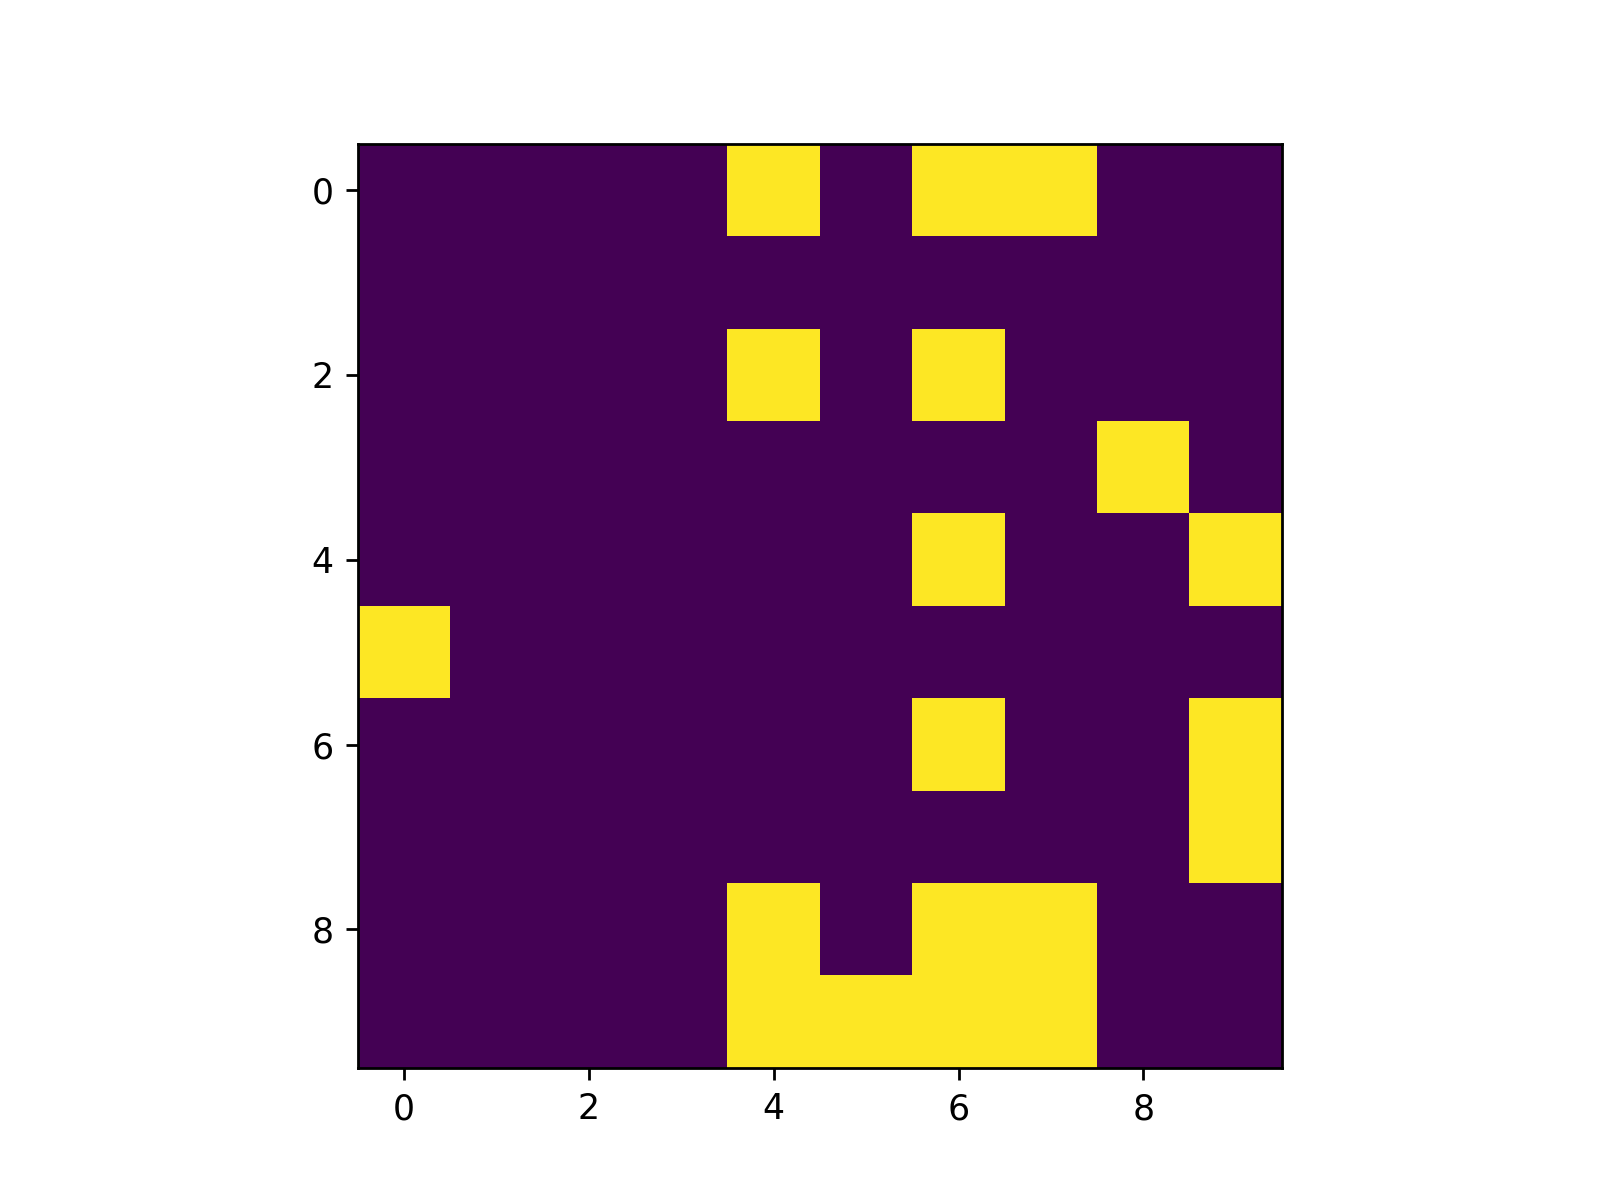

In [15]:
history_periodic = run_simulation(initial_grid, n_generations, is_periodic_boundary=True)
animation_periodic = animate_simulation(
    "evolution-periodic", history_periodic, framerate_medium, gif_writer_medium, save_file
)

## Exercise 4.3

<IPython.core.display.Javascript object>


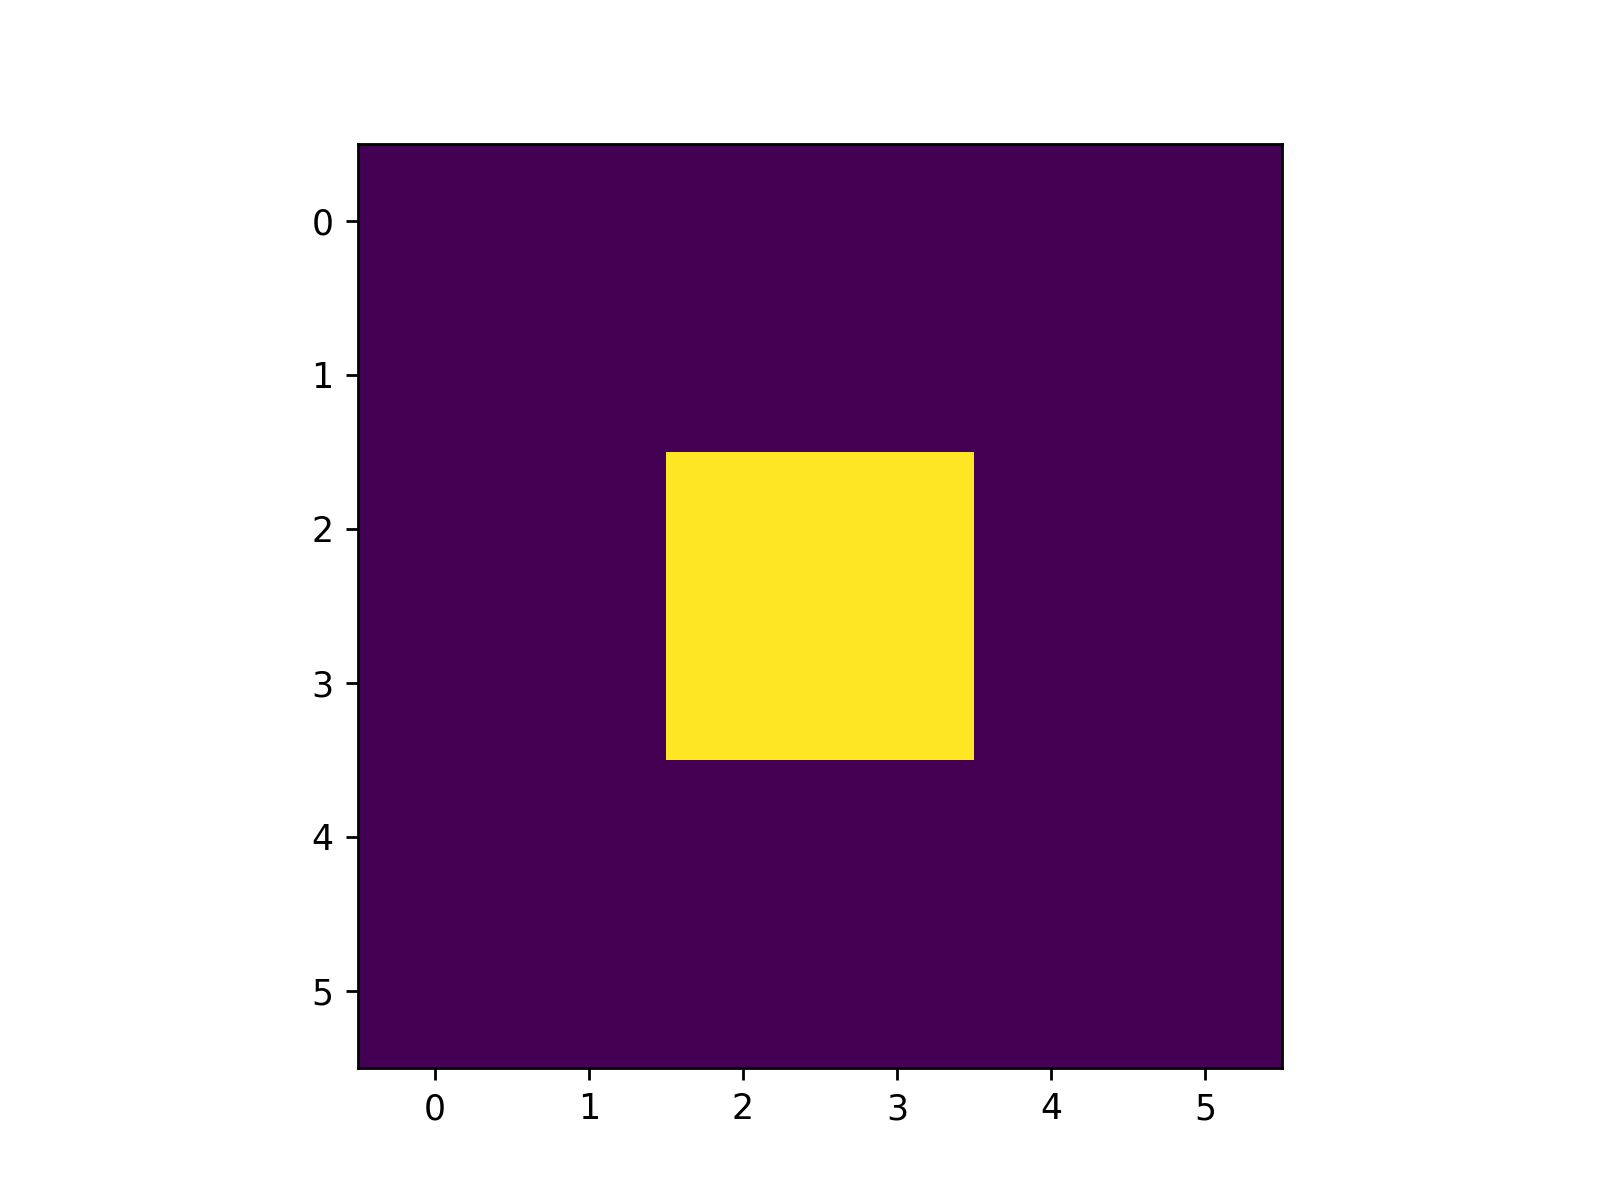

In [16]:
def simulate_block():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 2, False)

history_block = simulate_block()
animation_block = animate_simulation(
    "animation_block", history_block, framerate_medium, gif_writer_medium, save_file
)

<IPython.core.display.Javascript object>


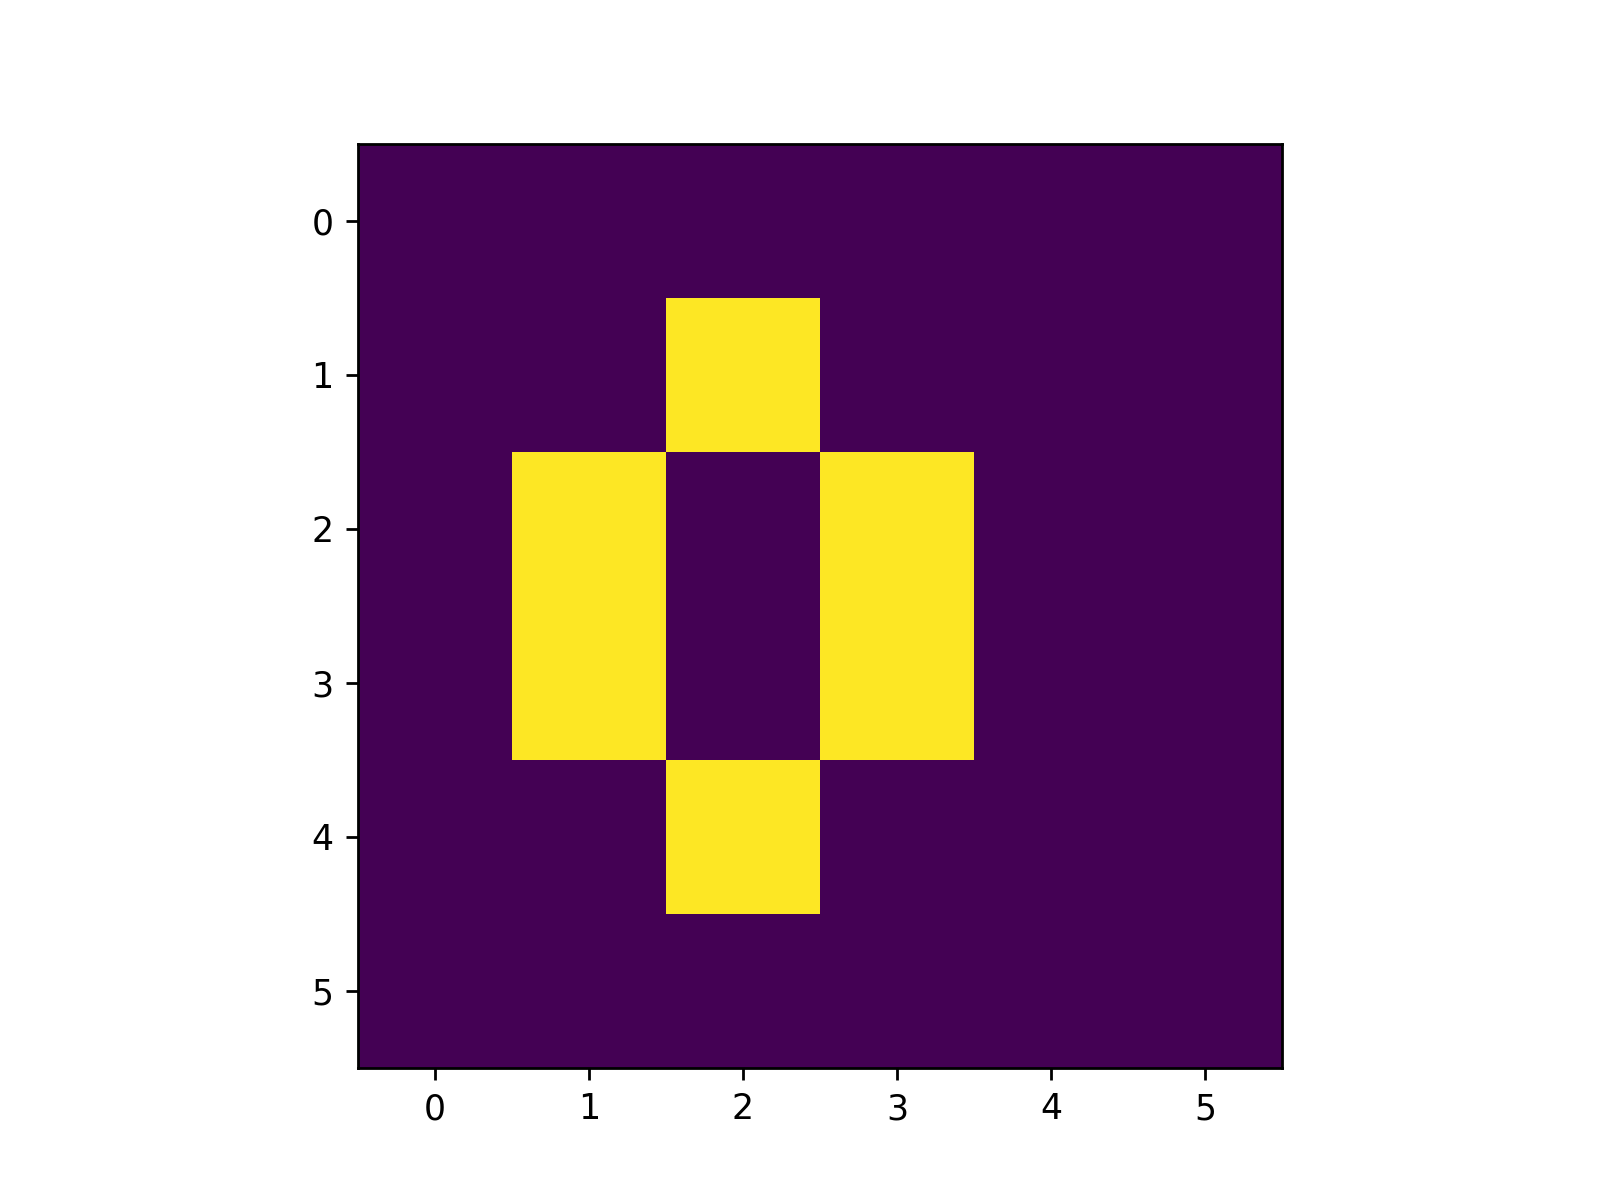

In [17]:
def simulate_beehive():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 2, False)

history_beehive = simulate_beehive()
animation_beehive = animate_simulation(
    "animation_beehive", history_beehive, framerate_medium, gif_writer_medium, save_file
)

<IPython.core.display.Javascript object>


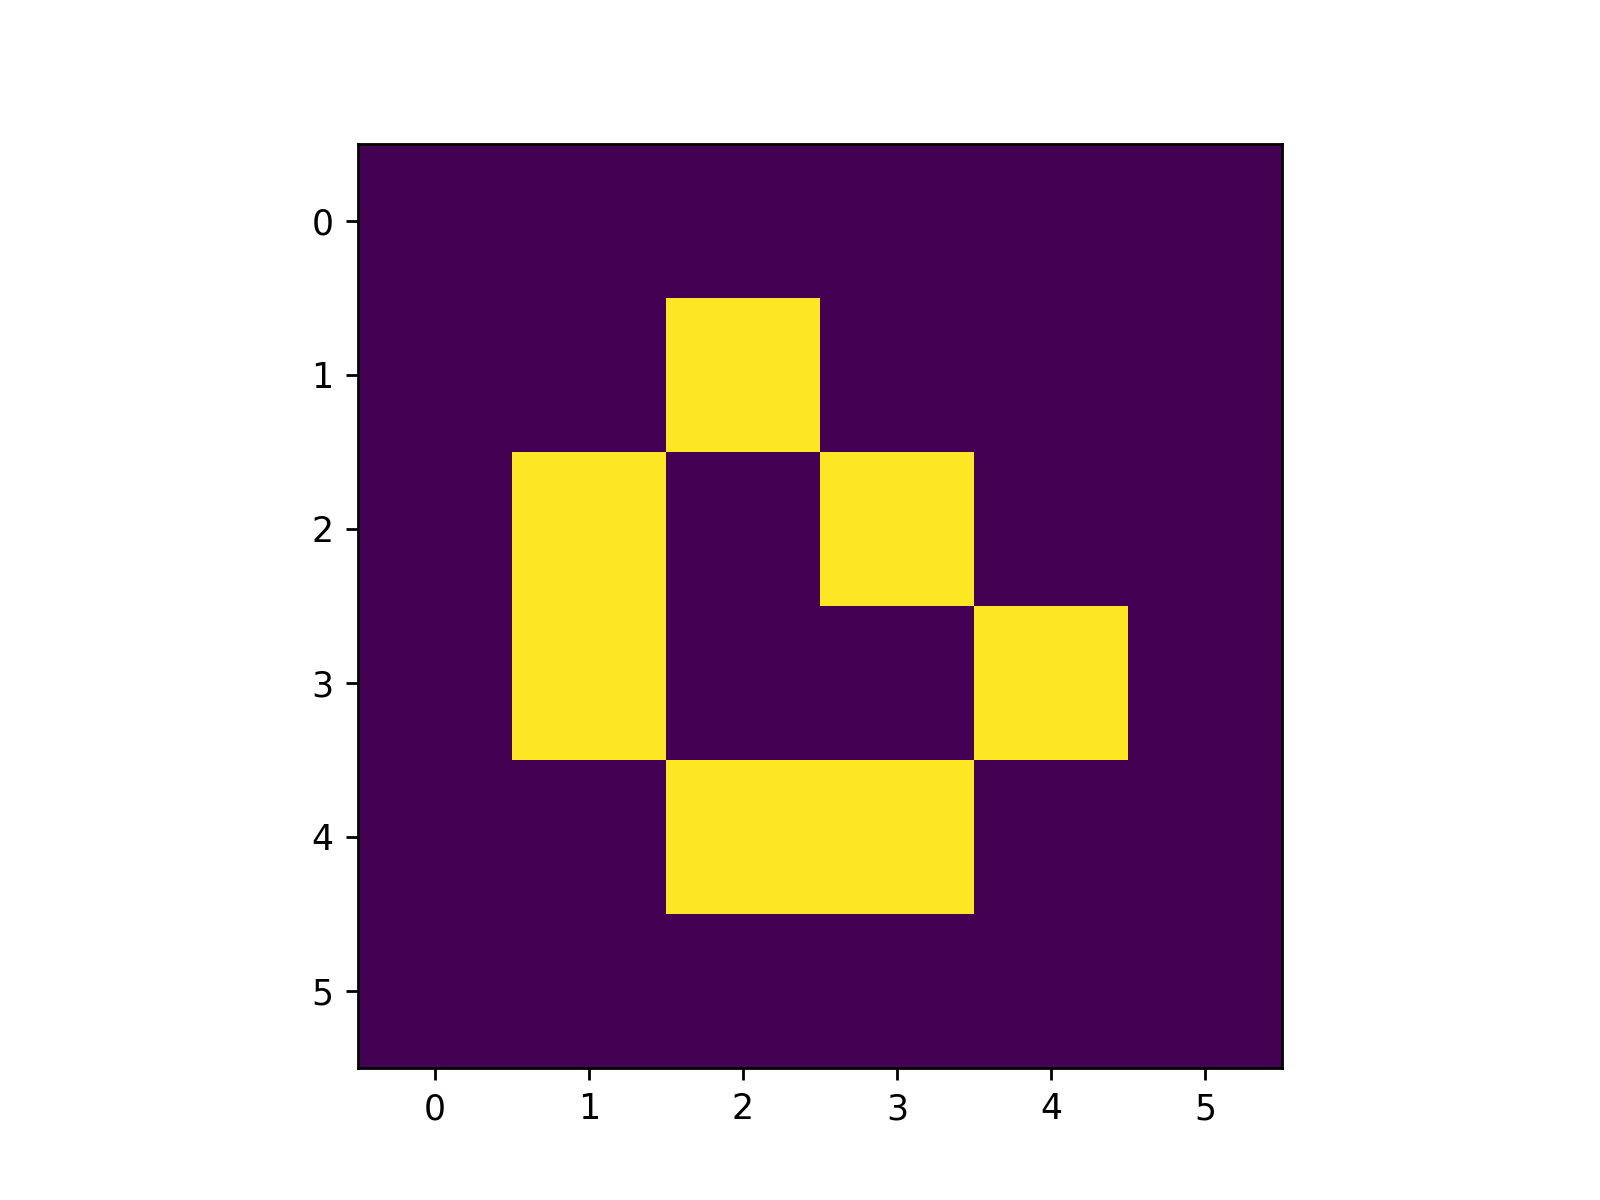

In [18]:
def simulate_loaf():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 2, False)
    
history_loaf = simulate_loaf()
animation_loaf = animate_simulation(
    "animation_loaf", history_loaf, framerate_medium, gif_writer_medium, save_file
)

<IPython.core.display.Javascript object>


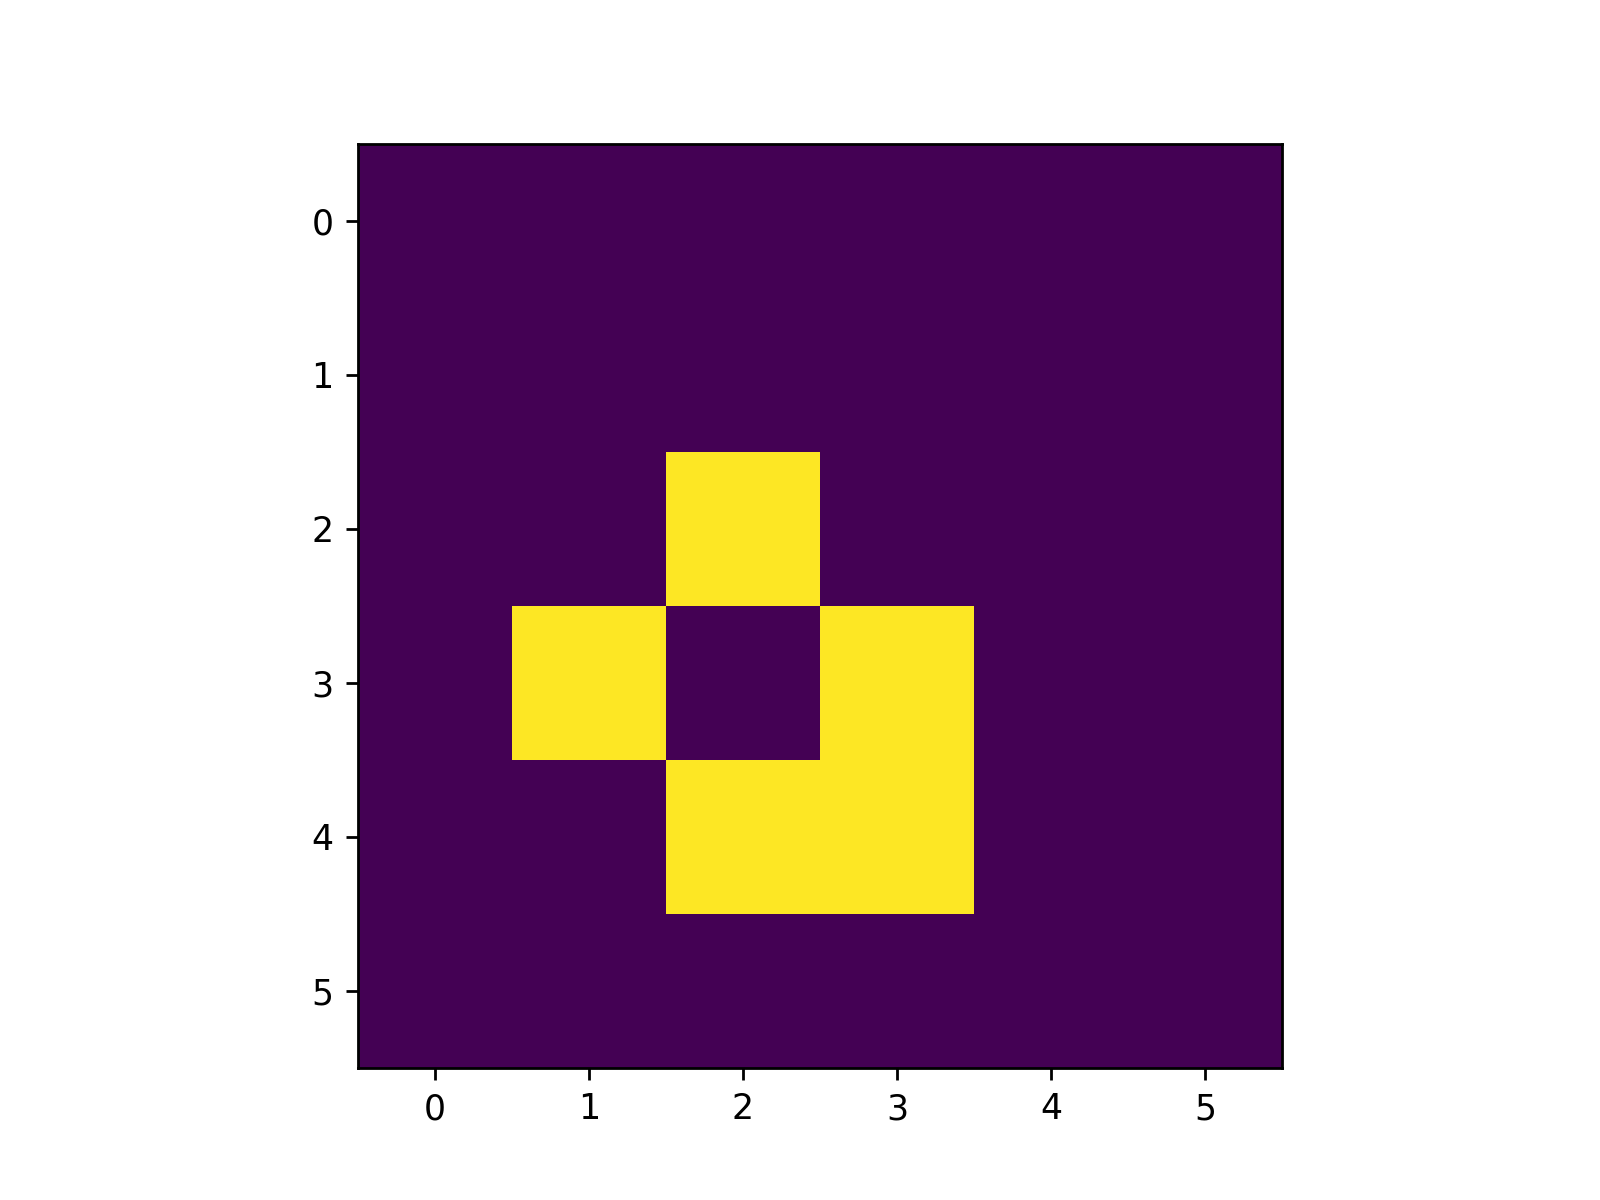

In [19]:
def simulate_boat():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 2, False)
    
history_boat = simulate_boat()
animation_boat = animate_simulation(
    "animation_boat", history_boat, framerate_medium, gif_writer_medium, save_file
)

<IPython.core.display.Javascript object>


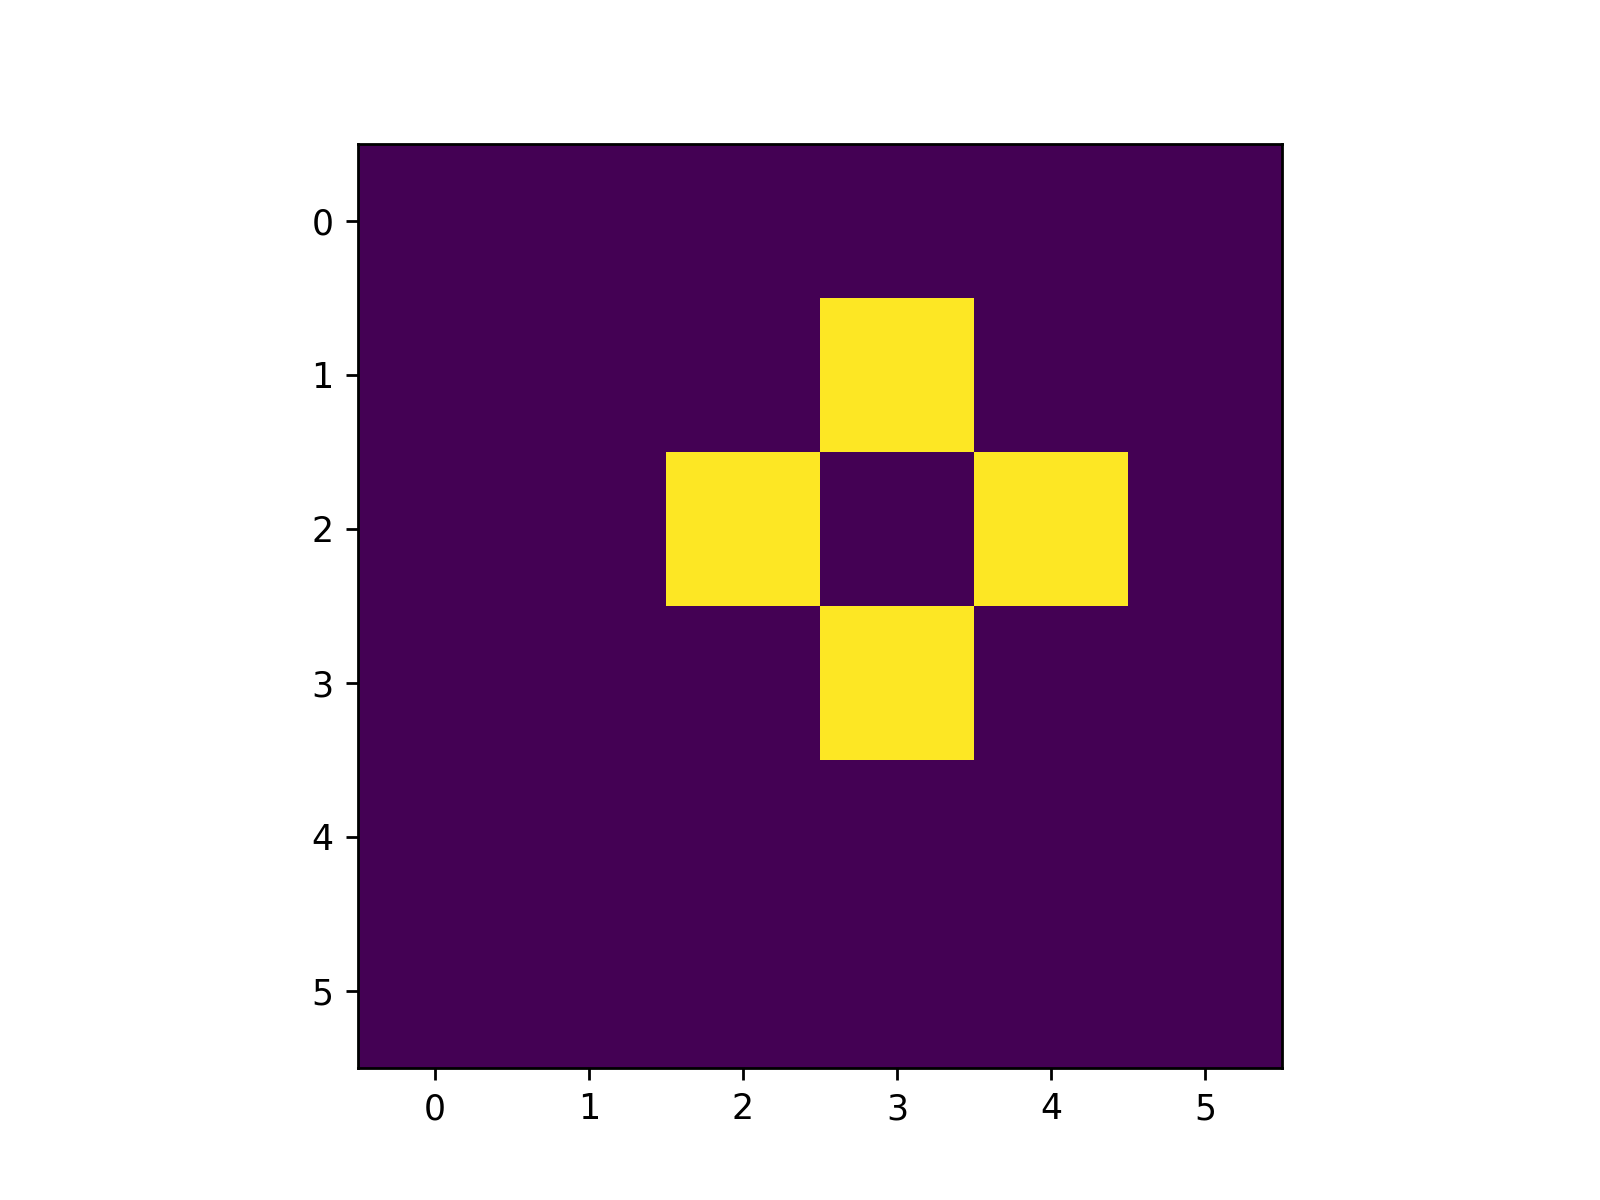

In [20]:
def simulate_tub():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 2, False)
    
history_tub = simulate_tub()
animation_tub = animate_simulation(
    "animation_tub", history_tub, framerate_medium, gif_writer_medium, save_file
)

## Exercise 4.4

<IPython.core.display.Javascript object>


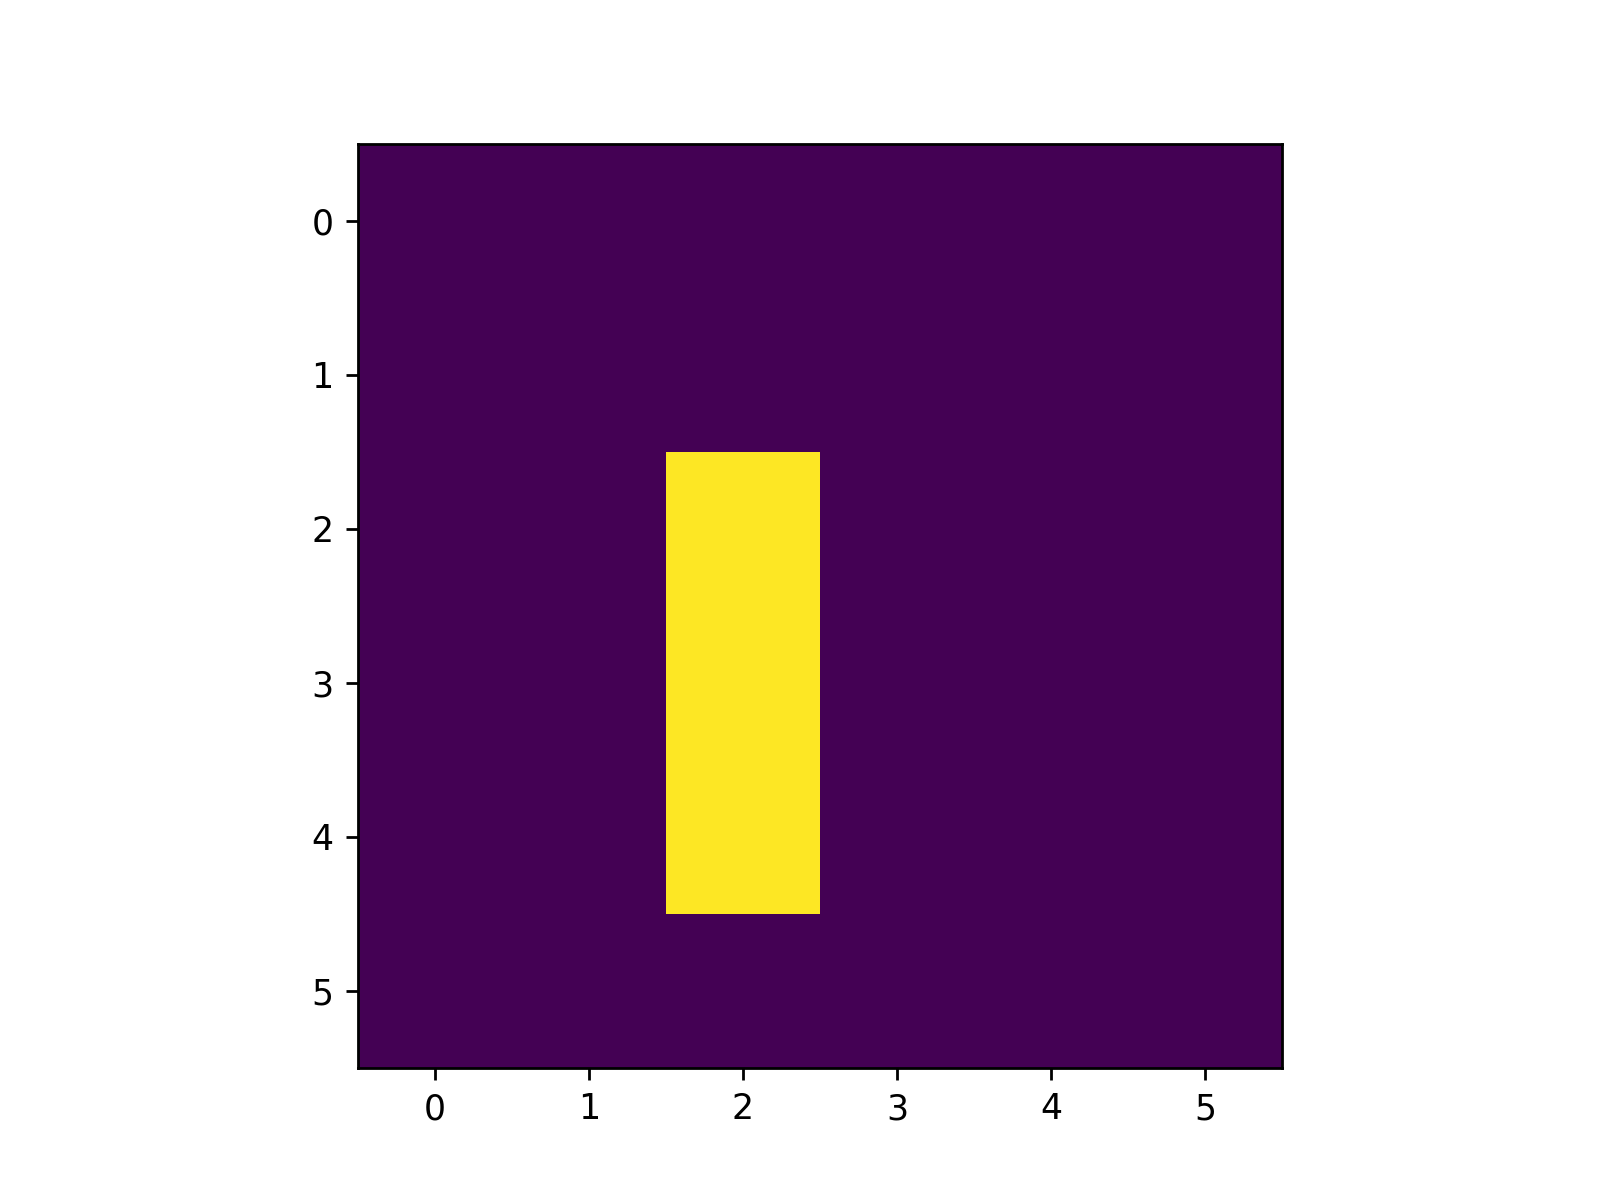

In [21]:
def simulate_blinker():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 4, False)
    
history_blinker = simulate_blinker()
animation_blinker = animate_simulation(
    "animation_blinker", history_blinker, framerate_medium, gif_writer_medium, save_file
)

<IPython.core.display.Javascript object>


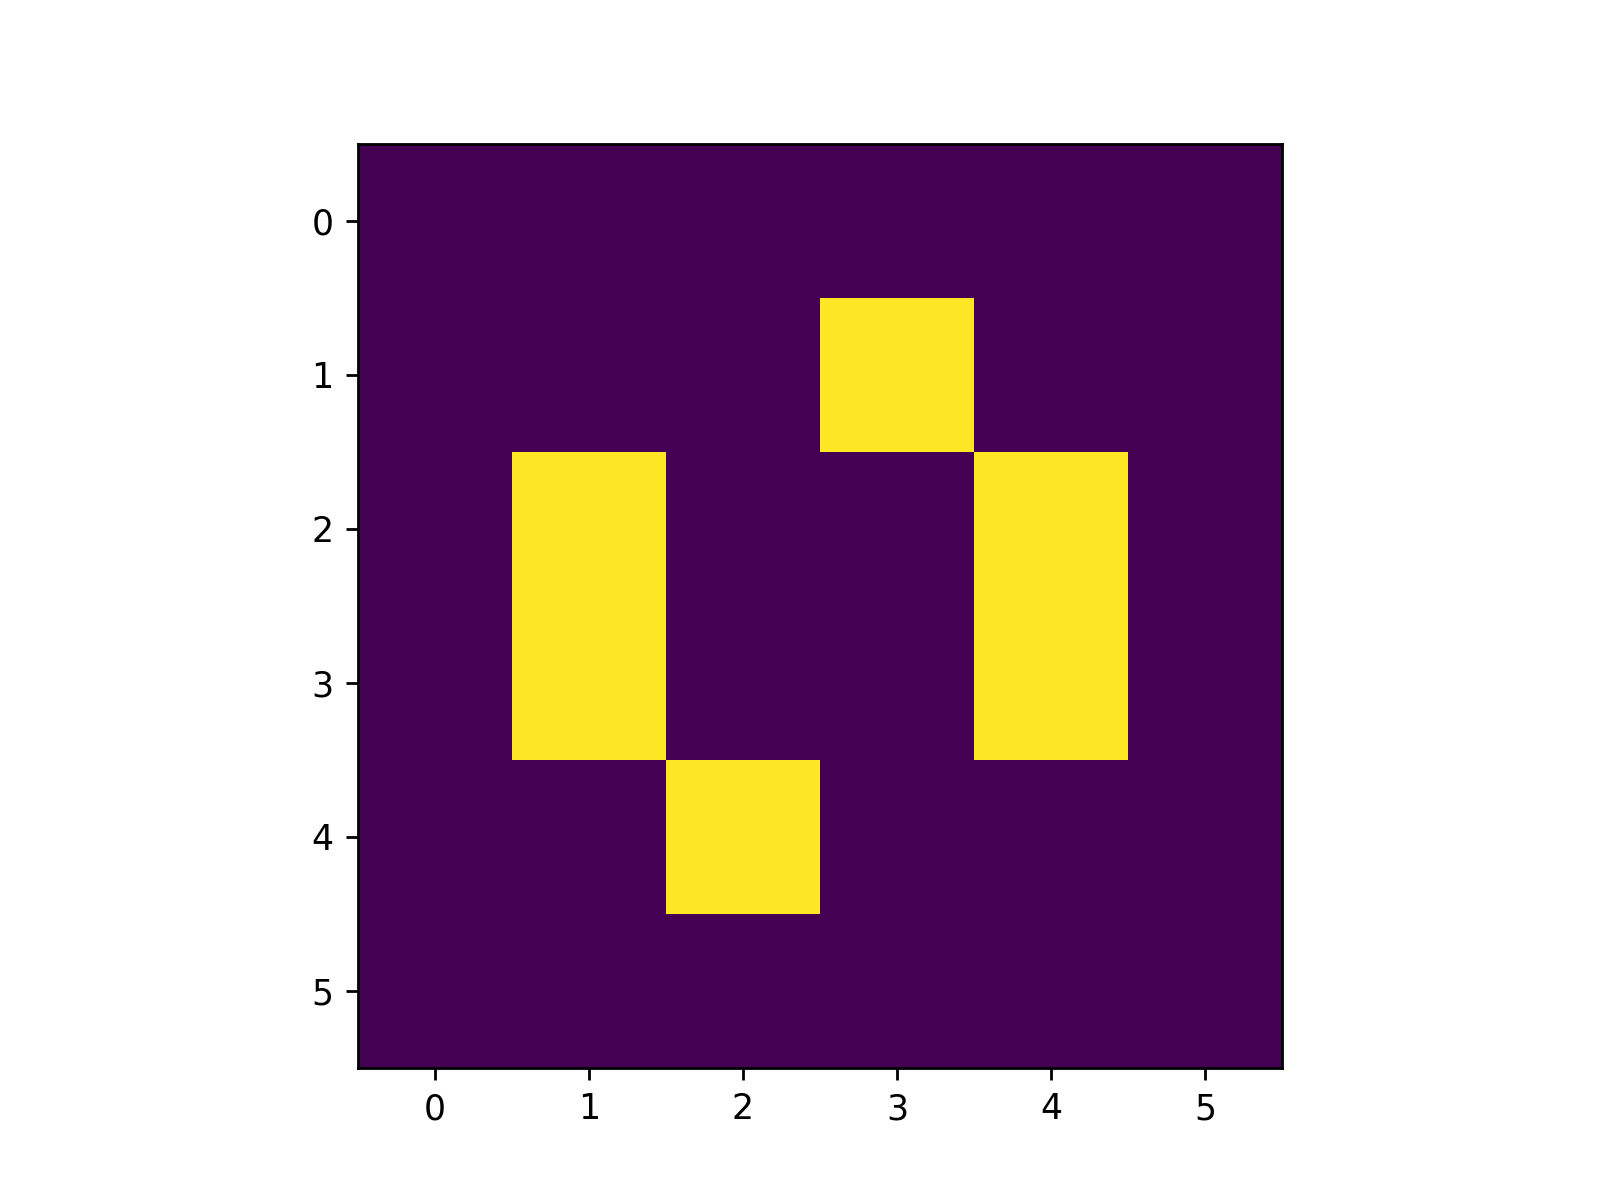

In [22]:
def simulate_toad():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0],
        [0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 4, False)
    
history_toad = simulate_toad()
animation_toad = animate_simulation(
    "animation_toad", history_toad, framerate_medium, gif_writer_medium, save_file
)

<IPython.core.display.Javascript object>


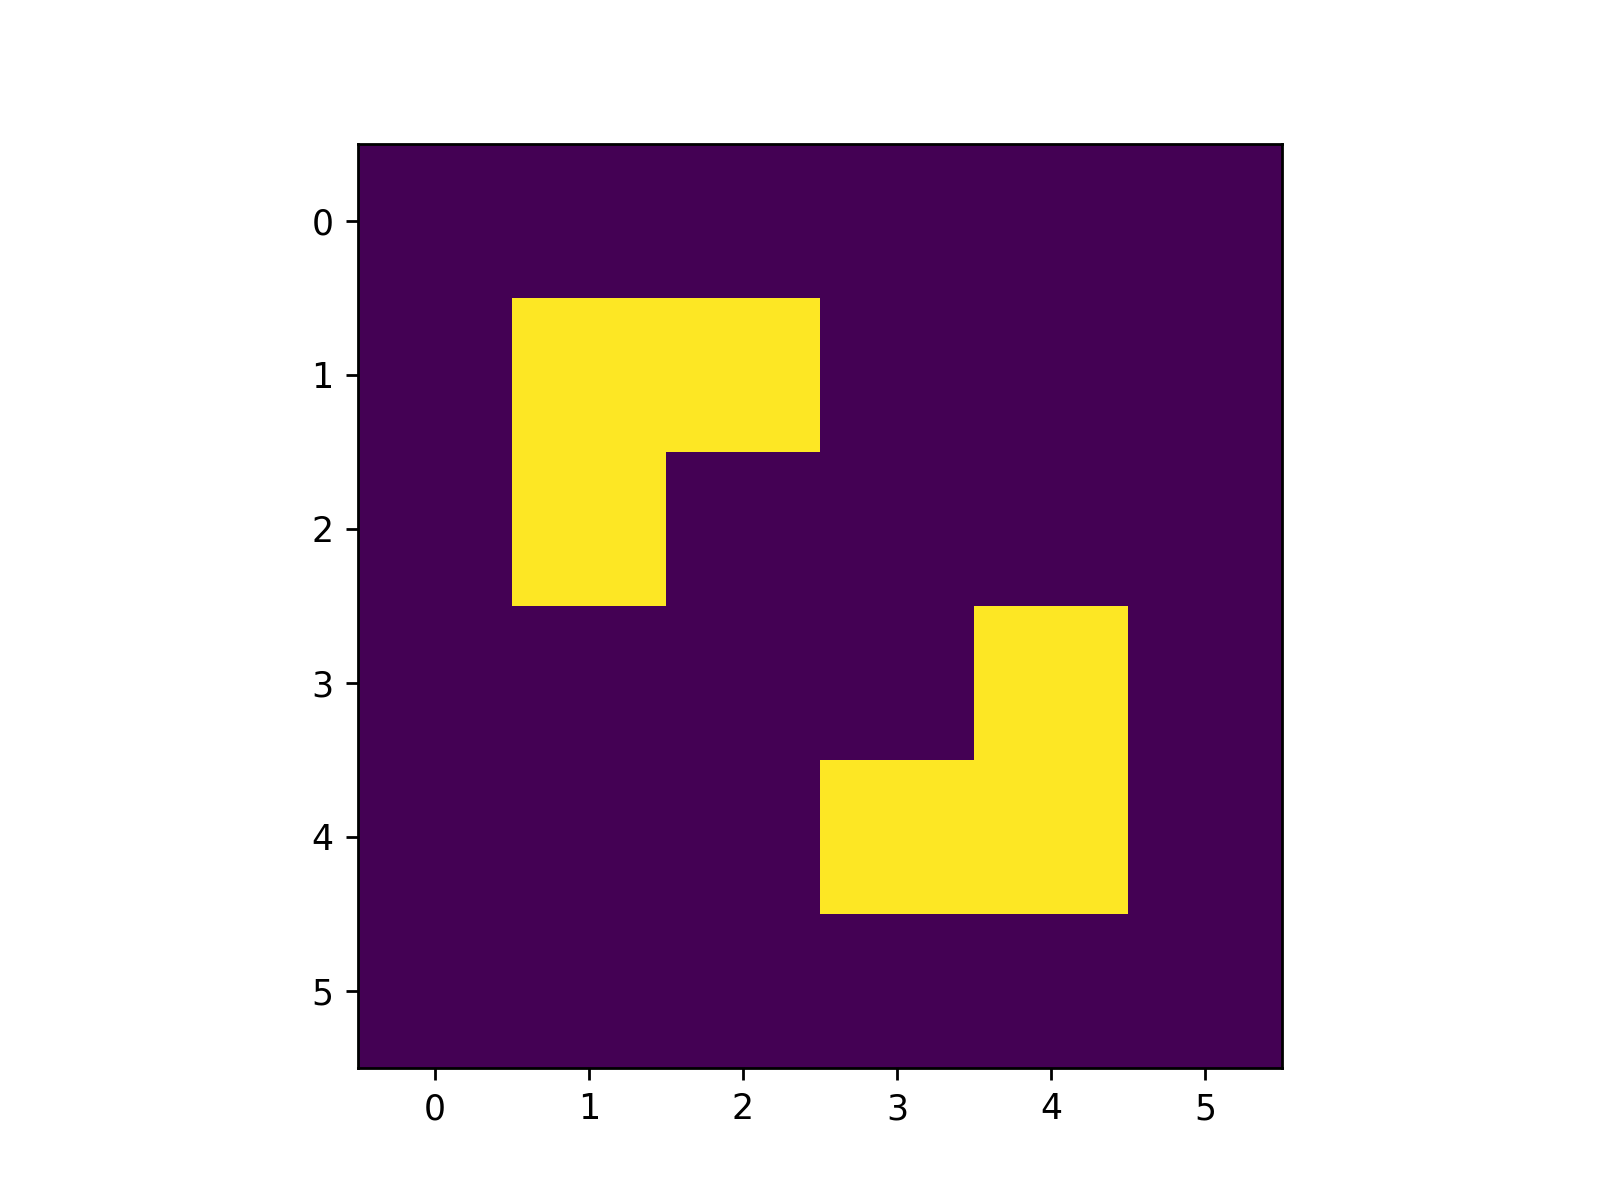

In [23]:
def simulate_beacon():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 4, False)
    
history_beacon = simulate_beacon()
animation_beacon = animate_simulation(
    "animation_beacon", history_beacon, framerate_medium, gif_writer_medium, save_file
)

## Exercise 4.5

<IPython.core.display.Javascript object>


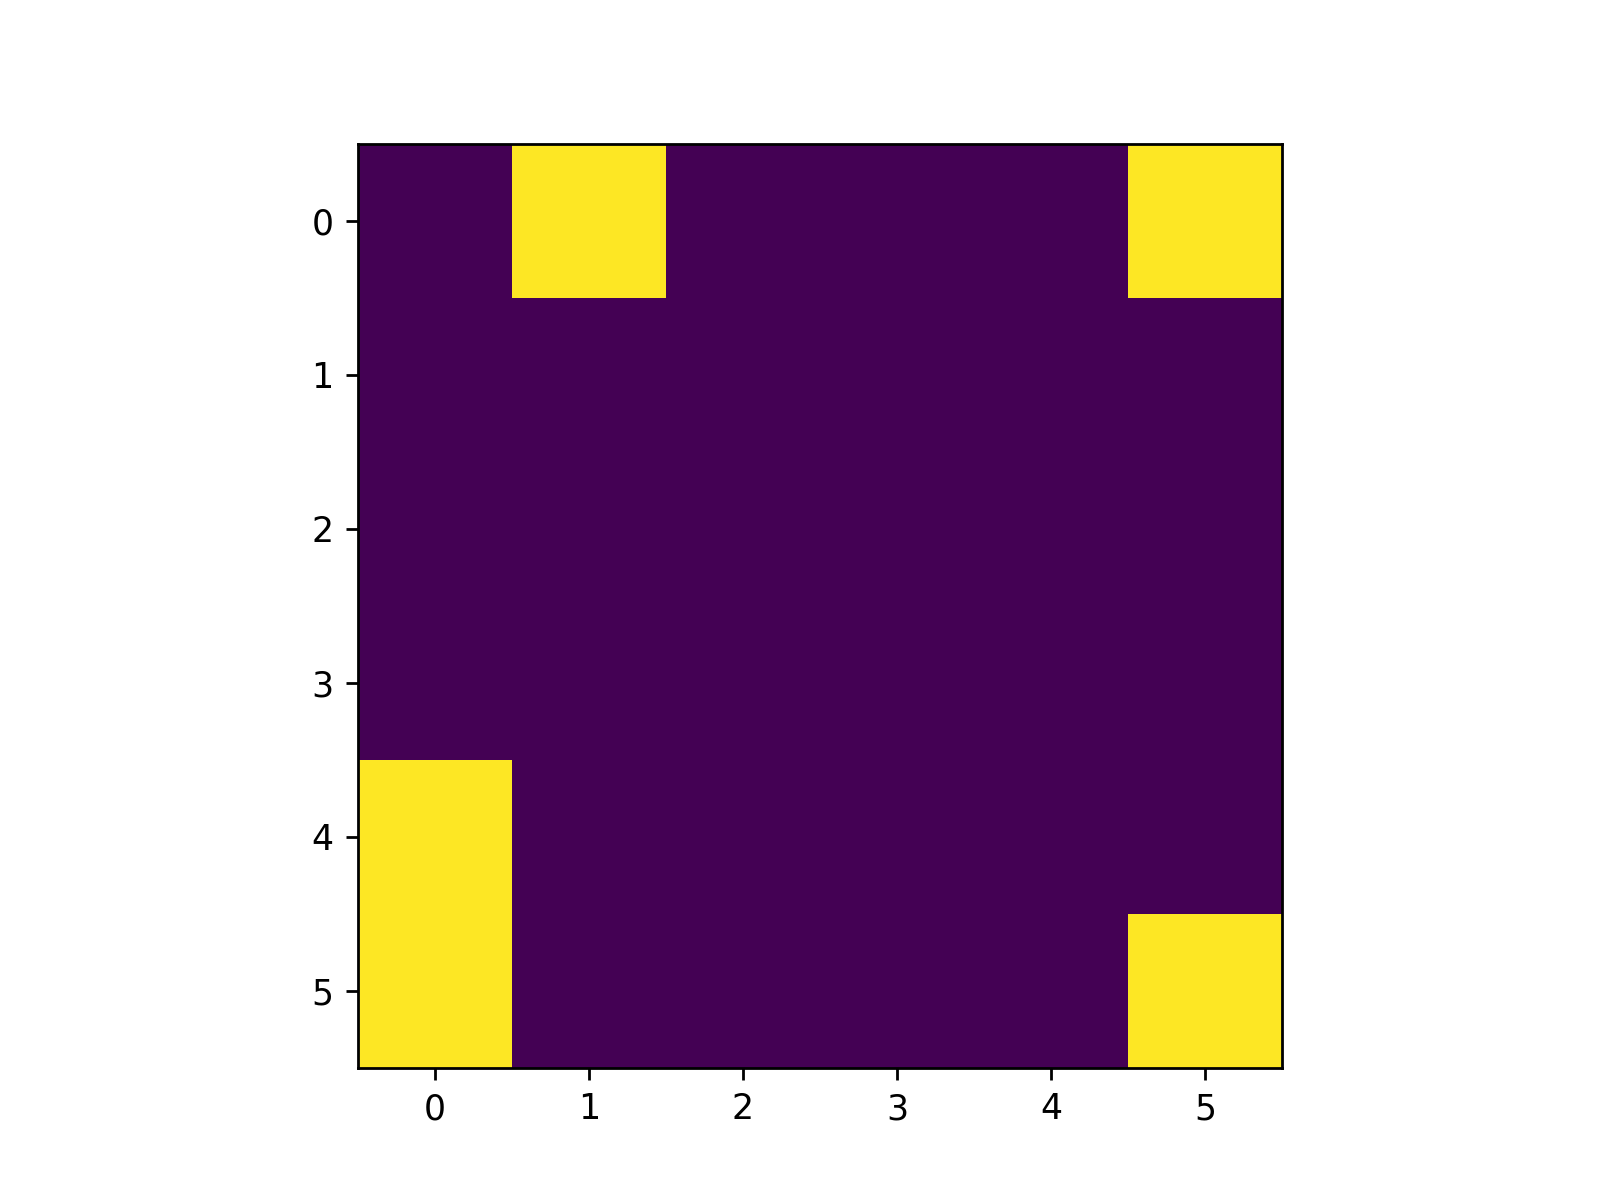

In [24]:
def simulate_glider_1():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 24, True)
    
history_glider_1 = simulate_glider_1()
animation_glider_1 = animate_simulation(
    "animation_glider_1", history_glider_1, framerate_medium, gif_writer_medium, save_file
)

<IPython.core.display.Javascript object>


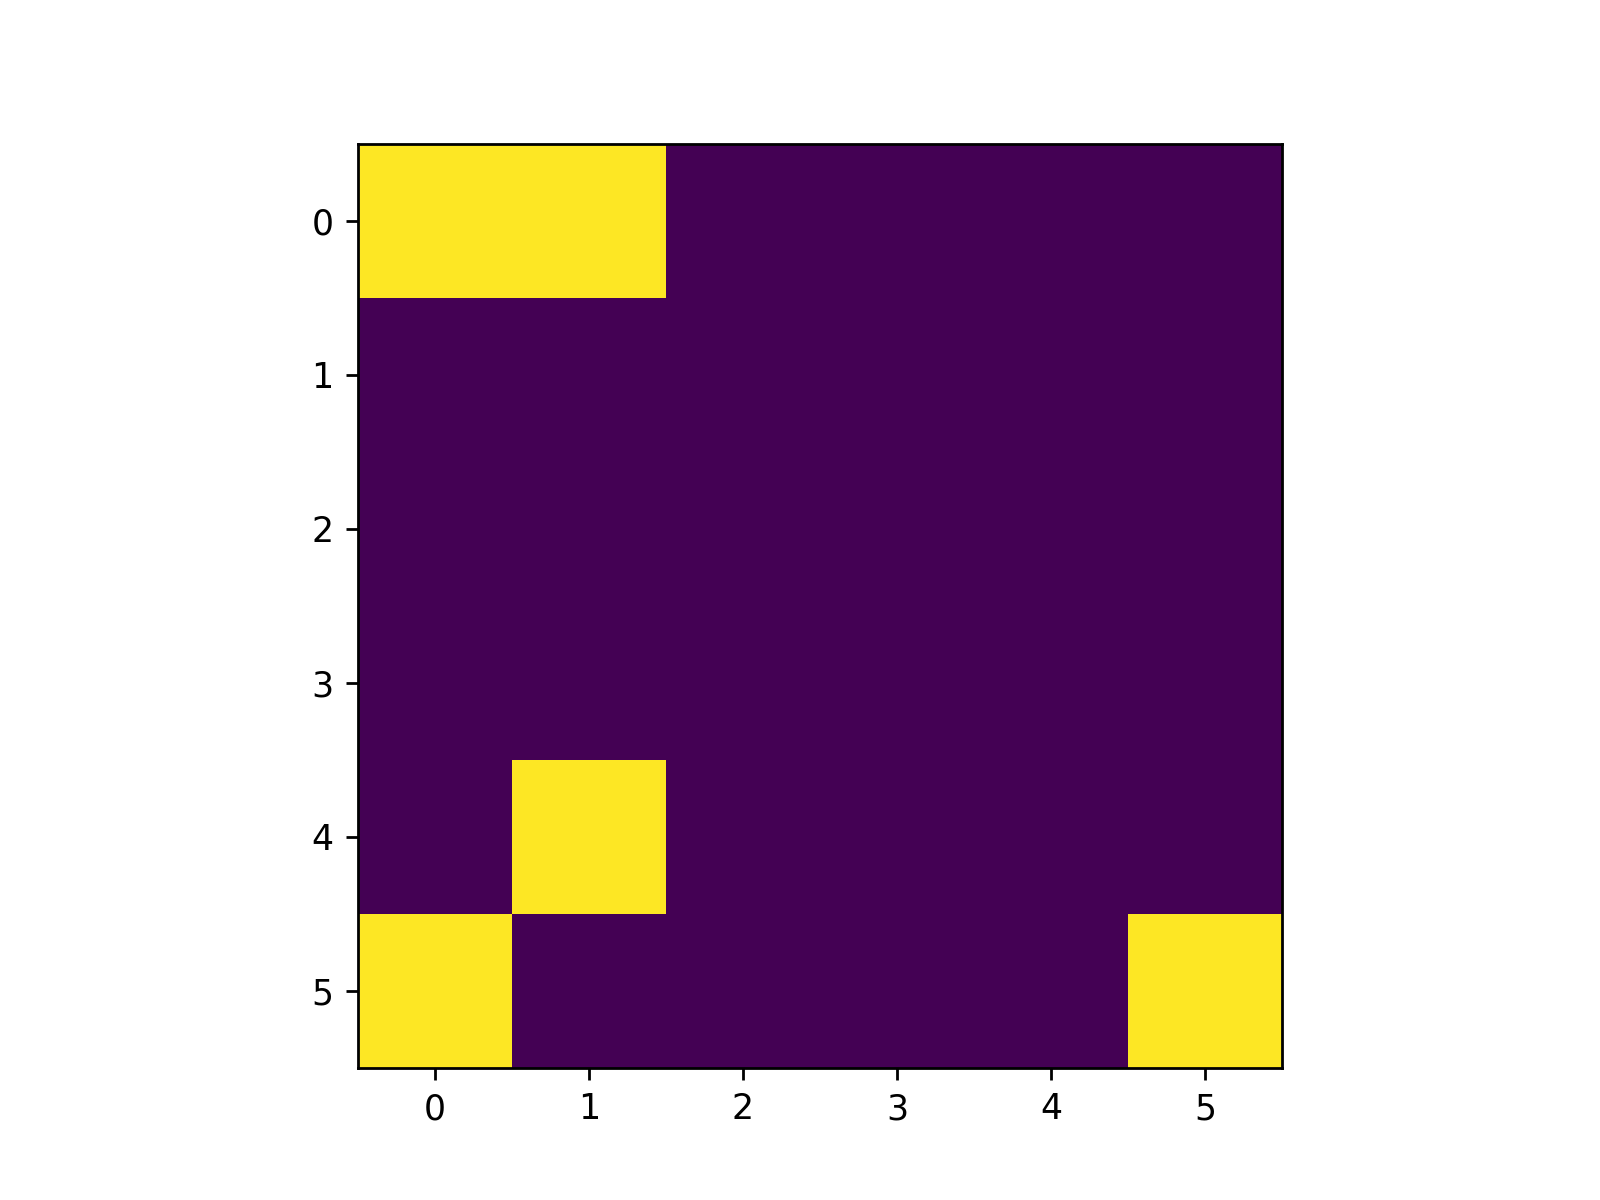

In [25]:
def simulate_glider_2():
    grid = np.array([
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 24, True)
    
history_glider_2 = simulate_glider_2()
animation_glider_2 = animate_simulation(
    "animation_glider_2", history_glider_2, framerate_medium, gif_writer_medium, save_file
)

<IPython.core.display.Javascript object>


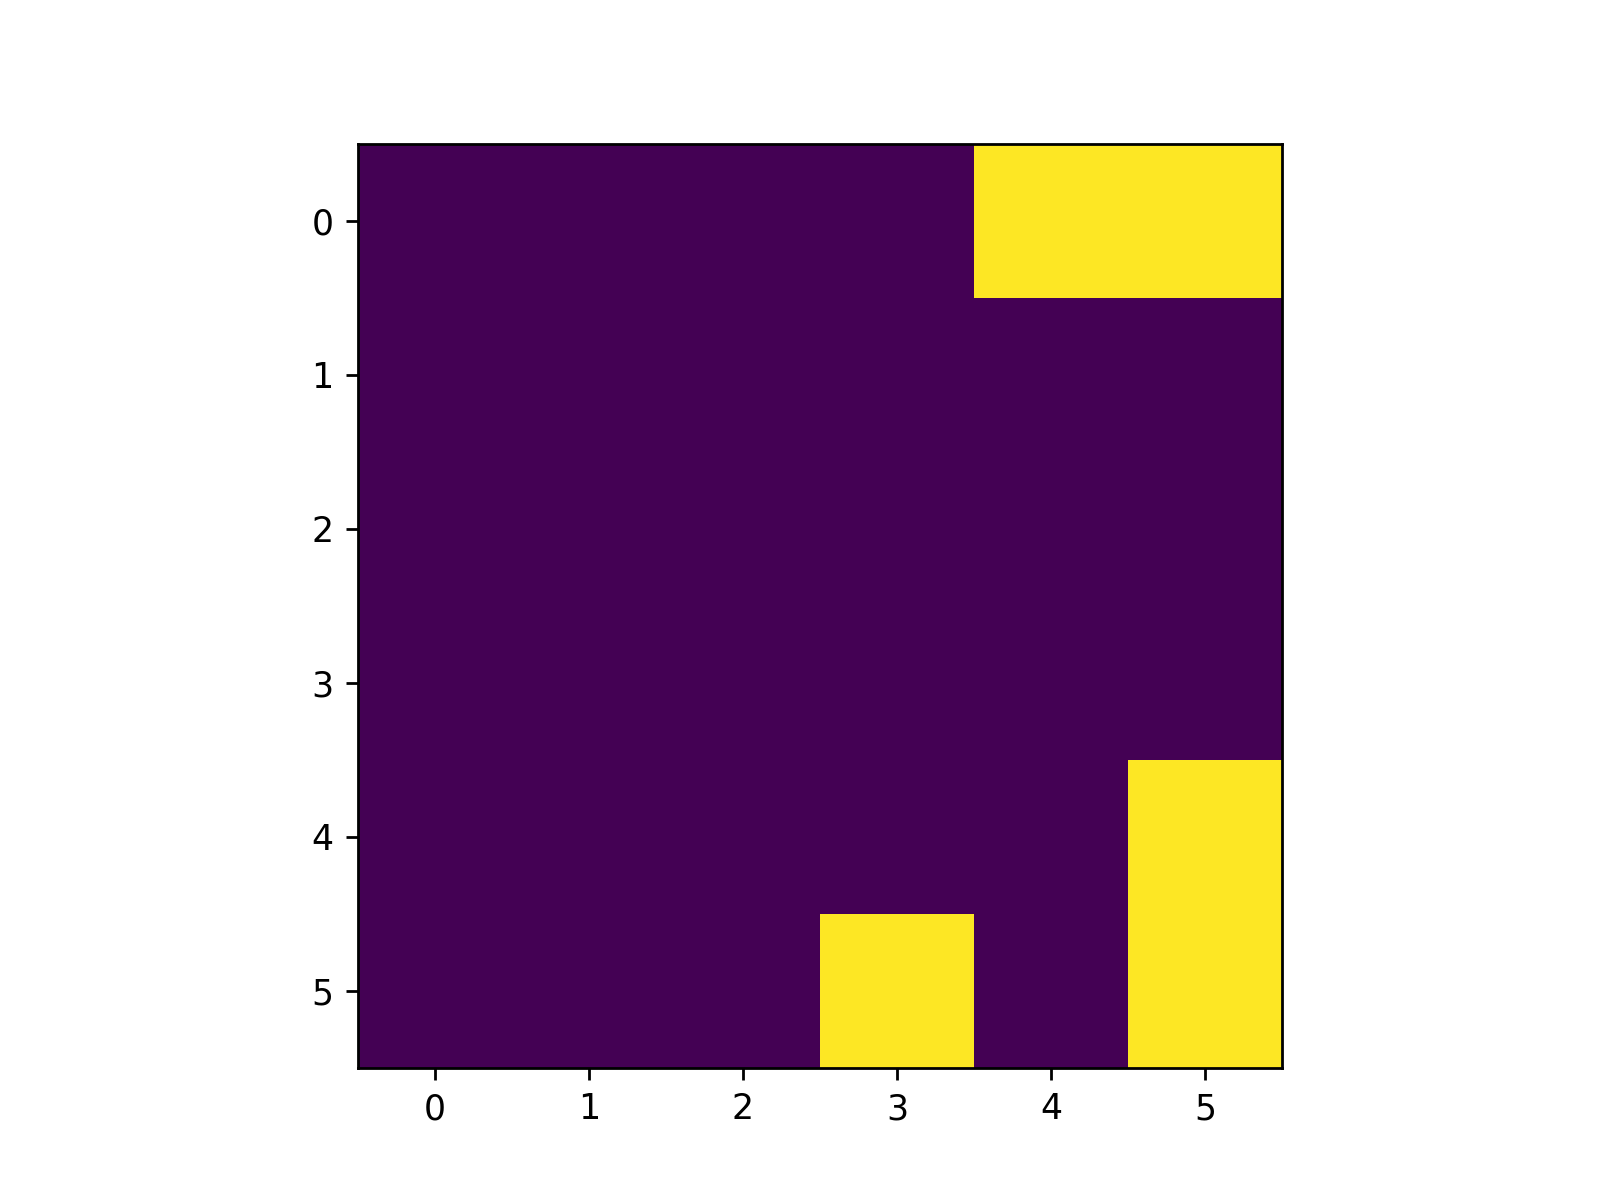

In [26]:
def simulate_glider_3():
    grid = np.array([
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 24, True)
    
history_glider_3 = simulate_glider_3()
animation_glider_3 = animate_simulation(
    "animation_glider_3", history_glider_3, framerate_medium, gif_writer_medium, save_file
)

<IPython.core.display.Javascript object>


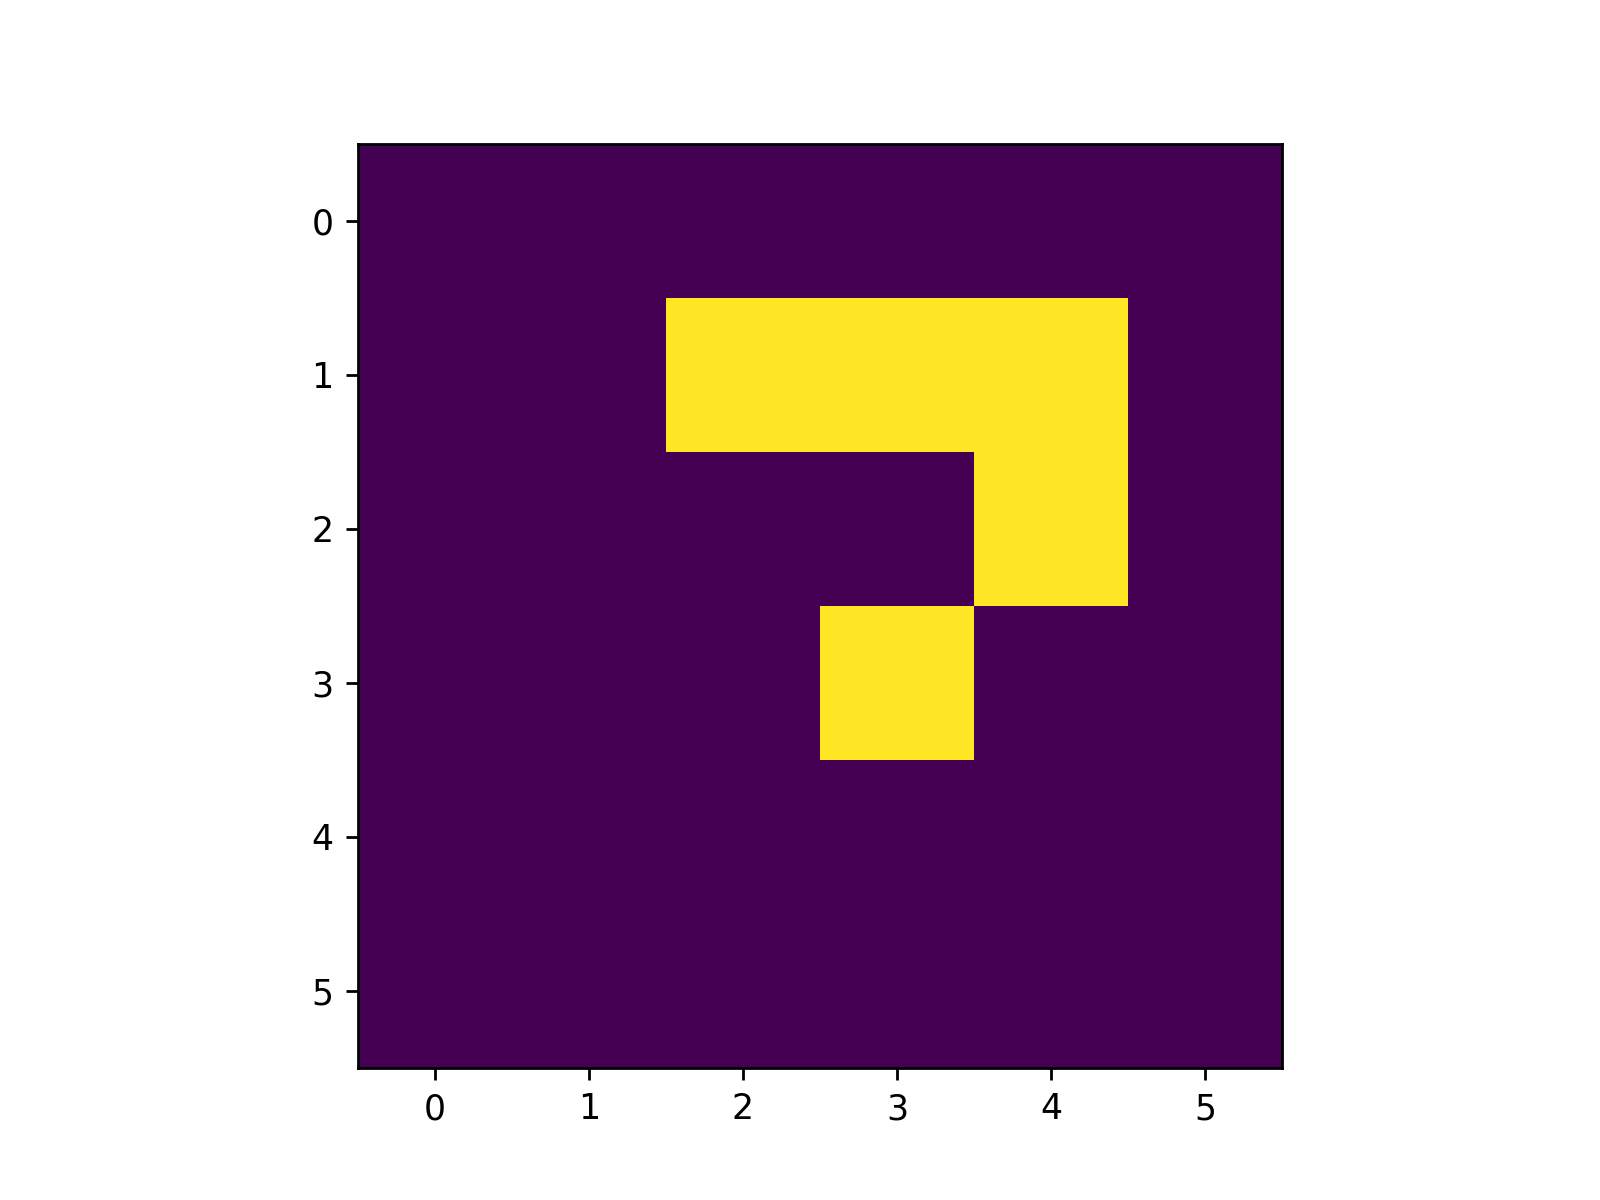

In [27]:
def simulate_glider_4():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 24, True)
    
history_glider_4 = simulate_glider_4()
animation_glider_4 = animate_simulation(
    "animation_glider_4", history_glider_4, framerate_medium, gif_writer_medium, save_file
)

## Exercise 4.6

In [28]:
def shift_config(grid, config_pos, config_size, shift):
    y, x = config_pos
    h, w = config_size
    dy, dx = shift
    config = grid[y:y+h, x:x+w]

    grid[y:y+h, x:x+w] = 0
    grid[y+dy:y+dy+h, x+dx:x+dx+w] = config

    return grid

def find_config_shift(grid, config, config_size): 
    h, w = config_size

    for y in range(0, 2*h):
        for x in range(0, 2*w):
            if np.array_equal(grid[y:y+h, x:x+w], config):
                return y, x

    return None

In [73]:
def generate_config(rng, config_size):
    config_h, config_w = config_size
    inner_size = (config_h - 2, config_w - 2)
    max_seed = inner_size[0] * inner_size[1]
    
    config_seed = rng.integers(1, 2**max_seed)
    inner_config = decimal_to_binary_array(config_seed, width=max_seed).reshape(inner_size)

    config = np.zeros(shape=config_size)
    config[1:-1, 1:-1] = rng.integers(0, 2, size=inner_size)
    
    re
    
    
generate_config(rng, (6,6))

In [71]:
def find_pattern_in_grid(rng, config_size, max_gen):
    config_h, config_w = config_size
    inner_size = (config_h - 1, config_w - 1)
    max_seed = inner_size[0] * inner_size[1]
    
    config_seed = rng.integers(1, 2**max_seed)
    inner_config = decimal_to_binary_array(config_seed, width=max_seed).reshape(inner_size)

    config = np.zeros(shape=config_size)
    config[1:-1, 1:-1] = rng.integers(0, 2, size=inner_size)
    #config = 
    #config[:, 0] = 0
    #config[:, -1] = 0
    #config[0, :] = 0
    #config[-1, :] = 0

    grid_size = (3*config_size[0], 3*config_size[1]) 
    grid = np.zeros(shape=grid_size, dtype='int')
    start_pos = config_size
    grid[start_pos[0]:start_pos[0]+config_size[0],
         start_pos[1]:start_pos[1]+config_size[1]] = config
    
    initial_grid = grid
    

    for gen in range(1, 10):
        grid = update_grid(grid, grid_size, False)
        pos = find_config_shift(grid, config, config_size)
        if pos:
            shift = (pos[0]-start_pos[0], pos[1]-start_pos[1])
            return gen, shift, config, initial_grid, grid
    
    return None


def find_patterns_in_grid(rng, n_iterations, max_generation, config_size):
    for i in range(n_iterations):
        res = find_pattern_in_grid(rng, config_size, max_generation)
        if res:
            gen, shift, config, grid = res
            # TODO

<IPython.core.display.Javascript object>


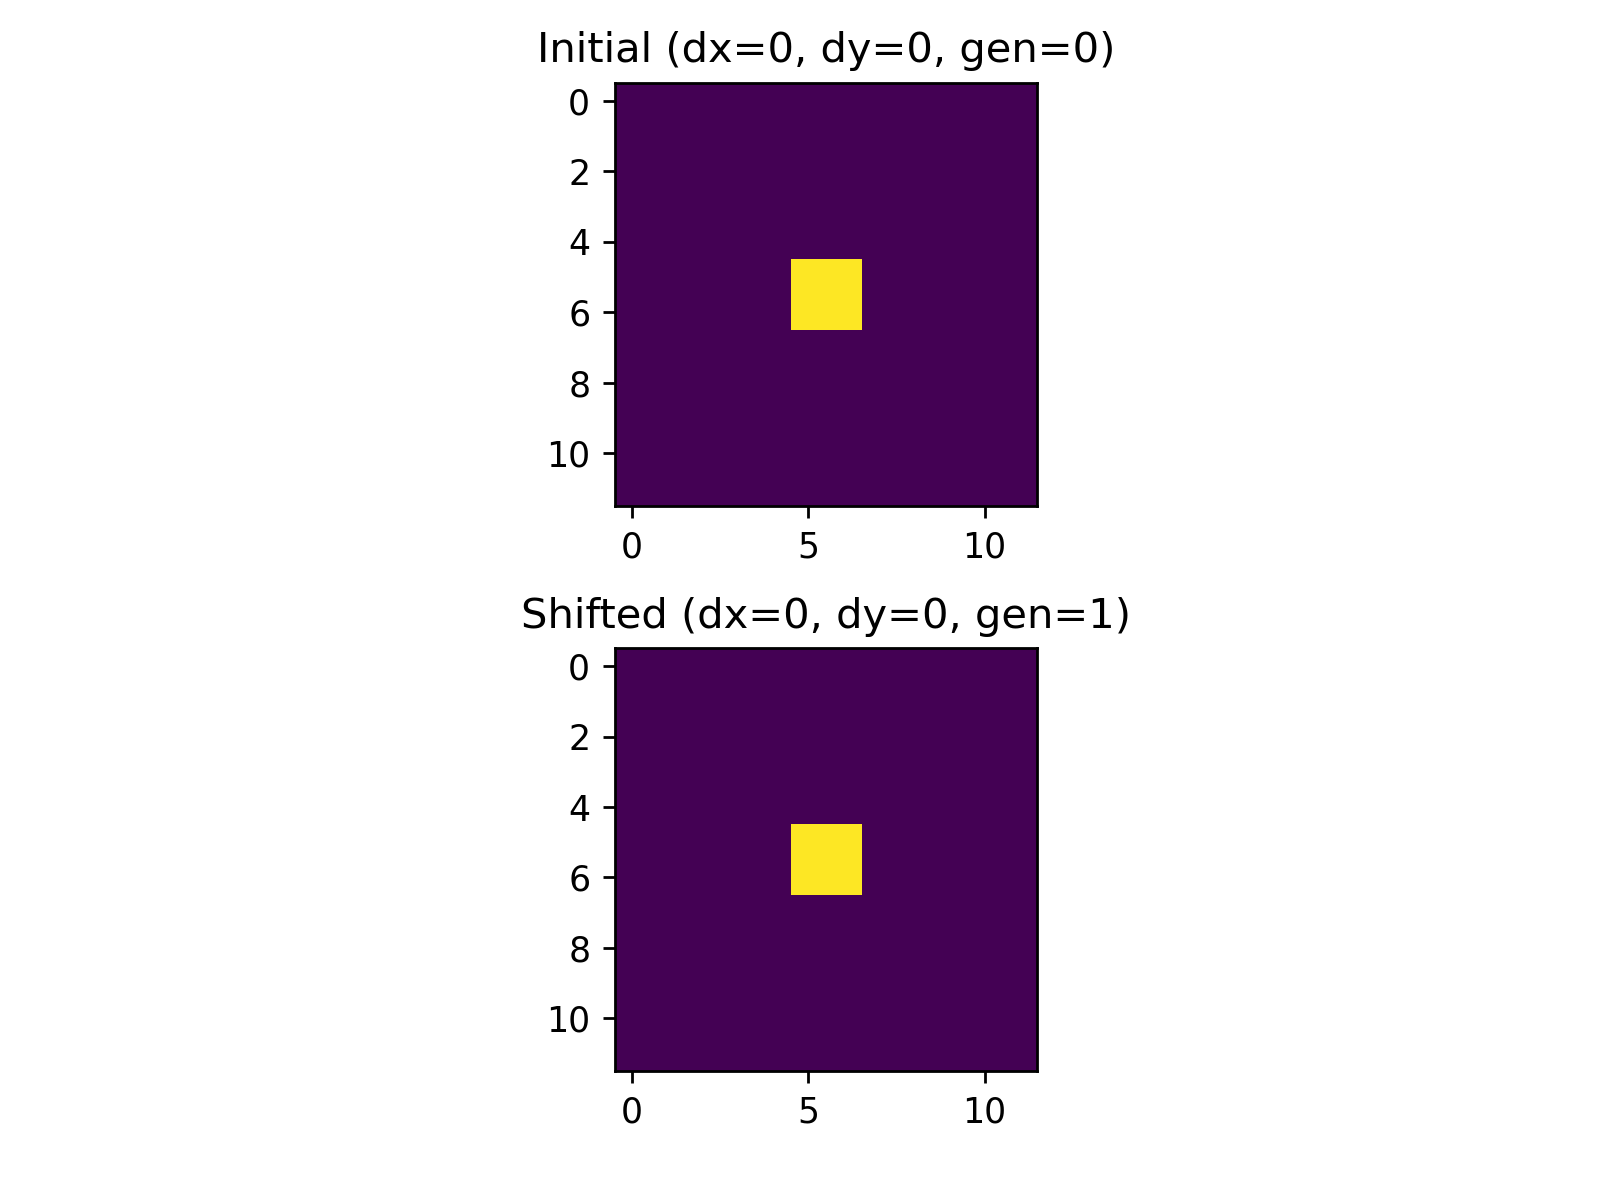

<IPython.core.display.Javascript object>


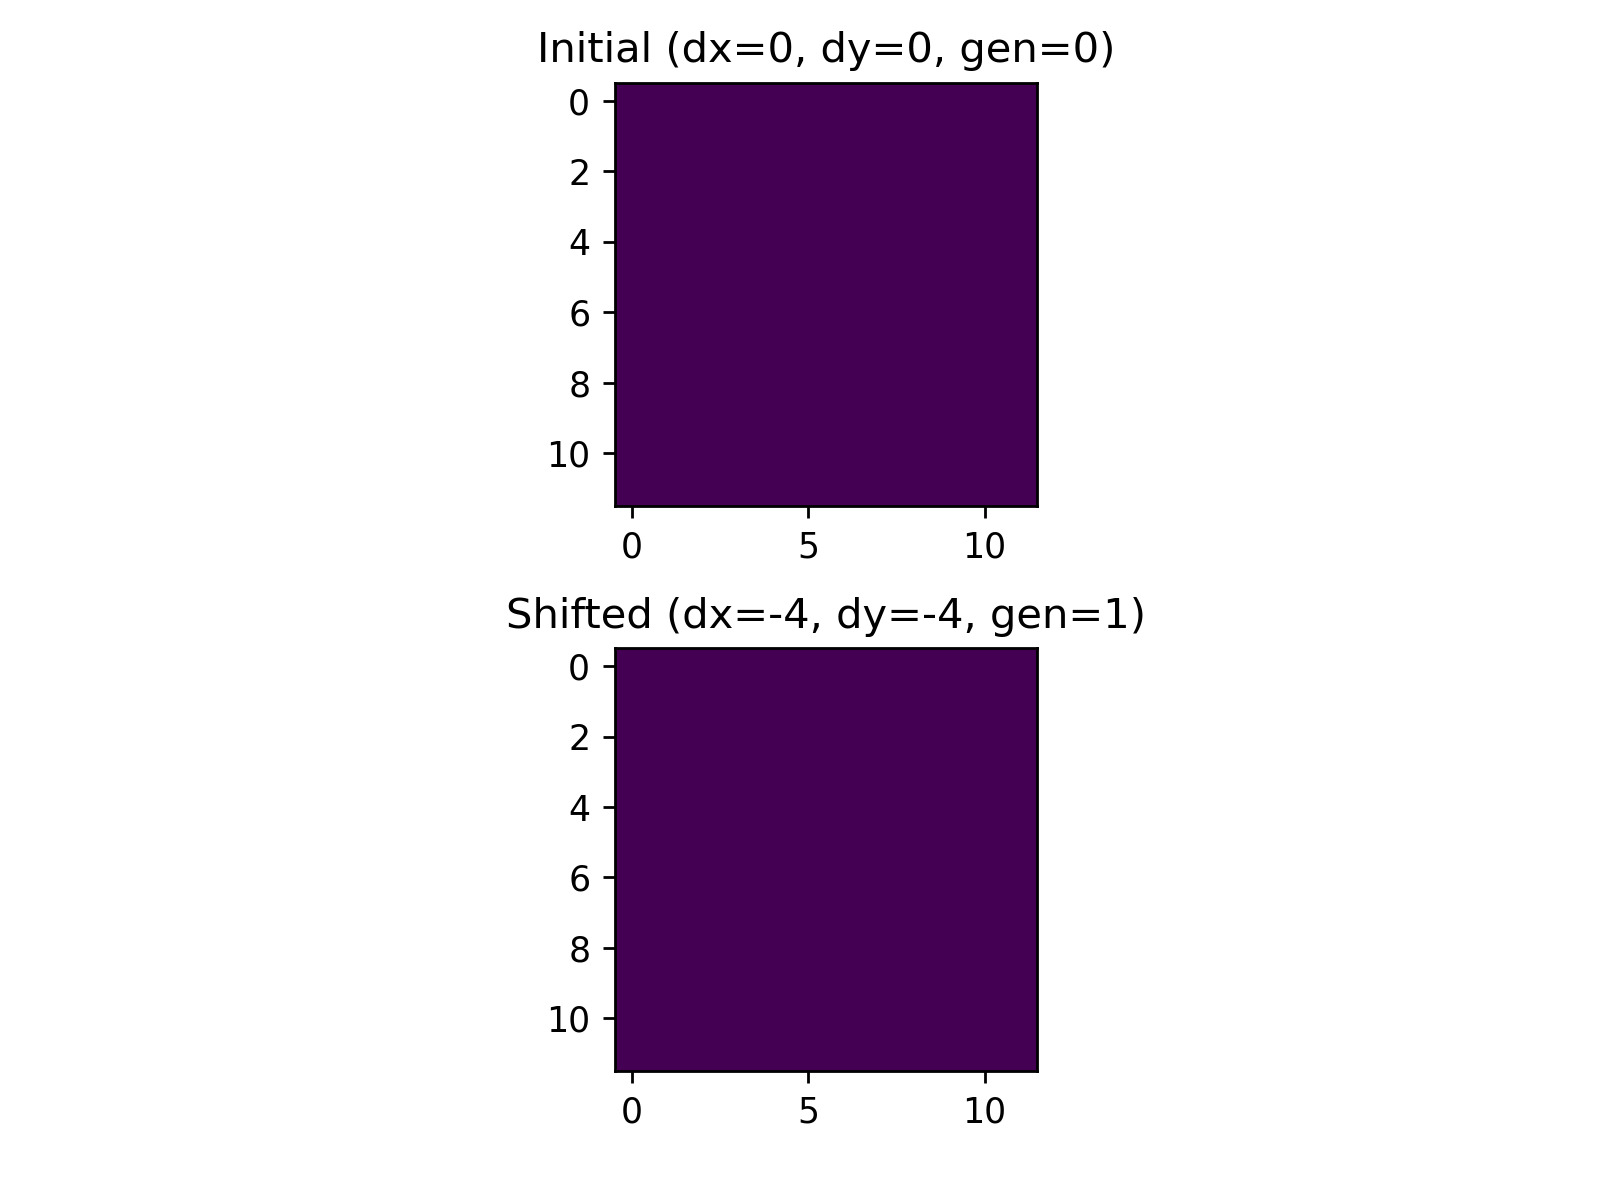

<IPython.core.display.Javascript object>


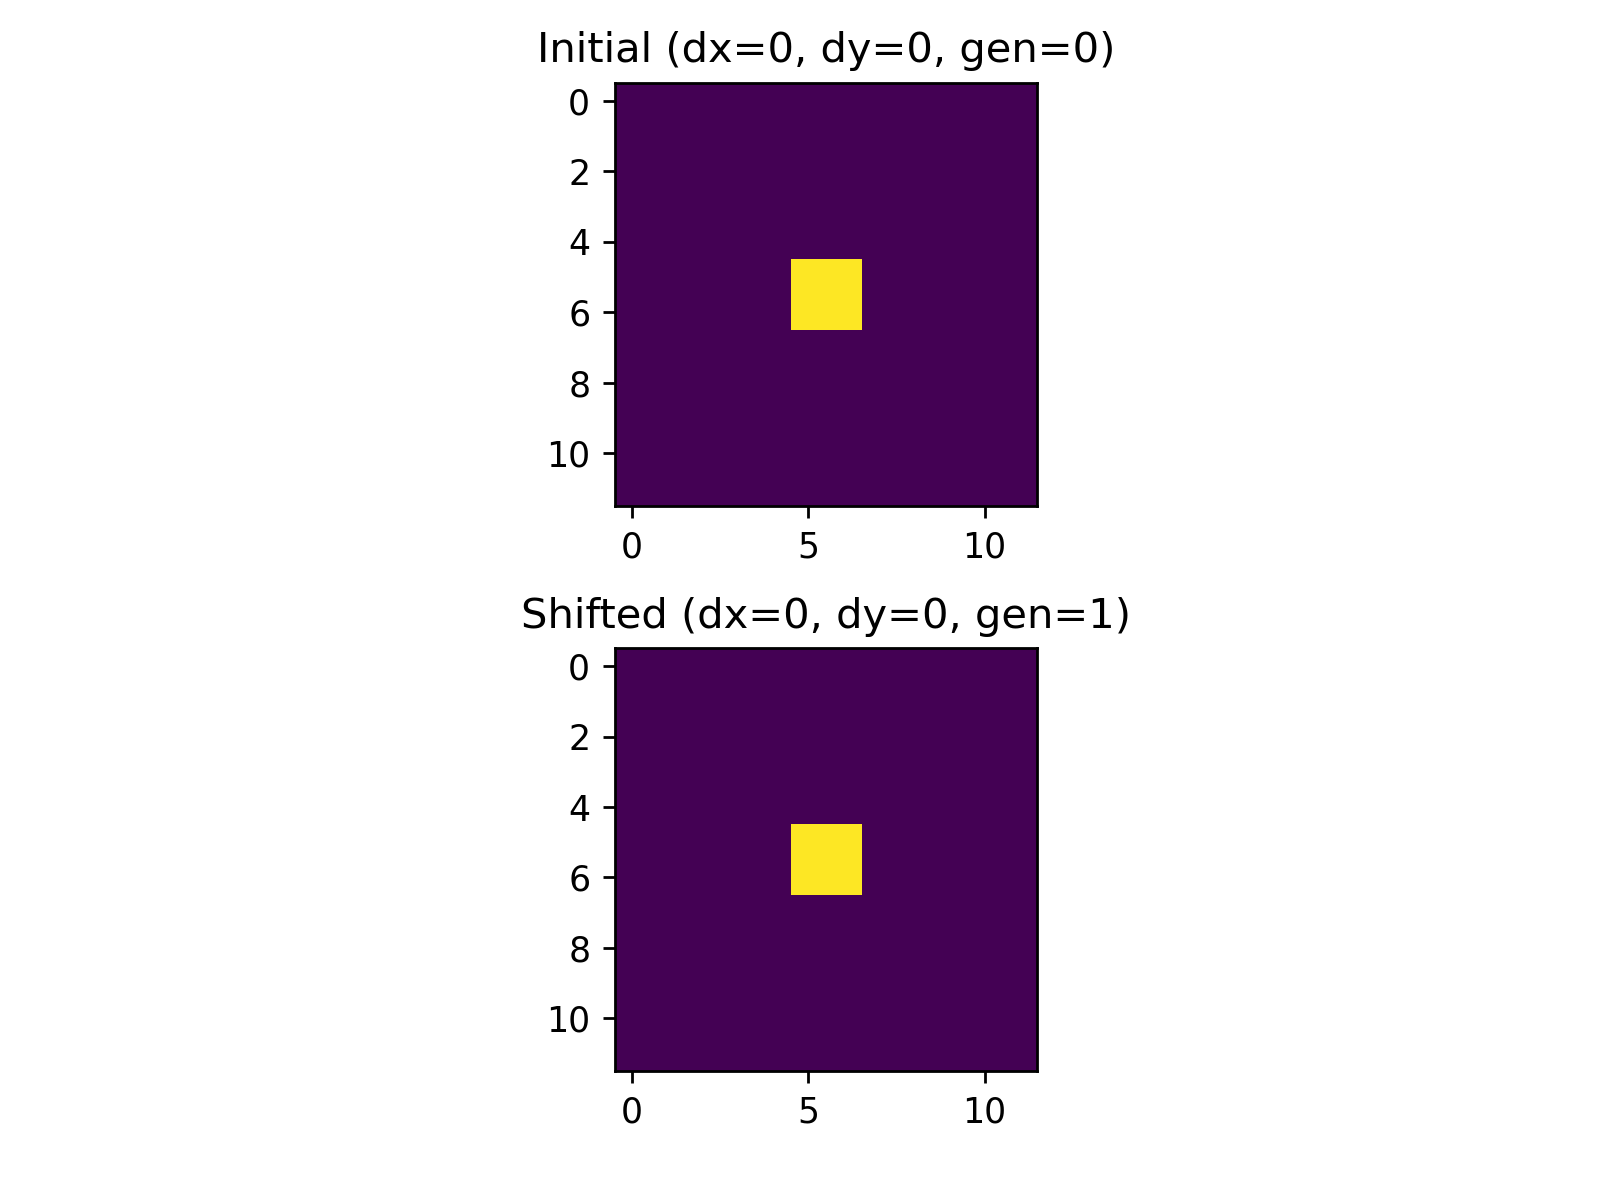

<IPython.core.display.Javascript object>


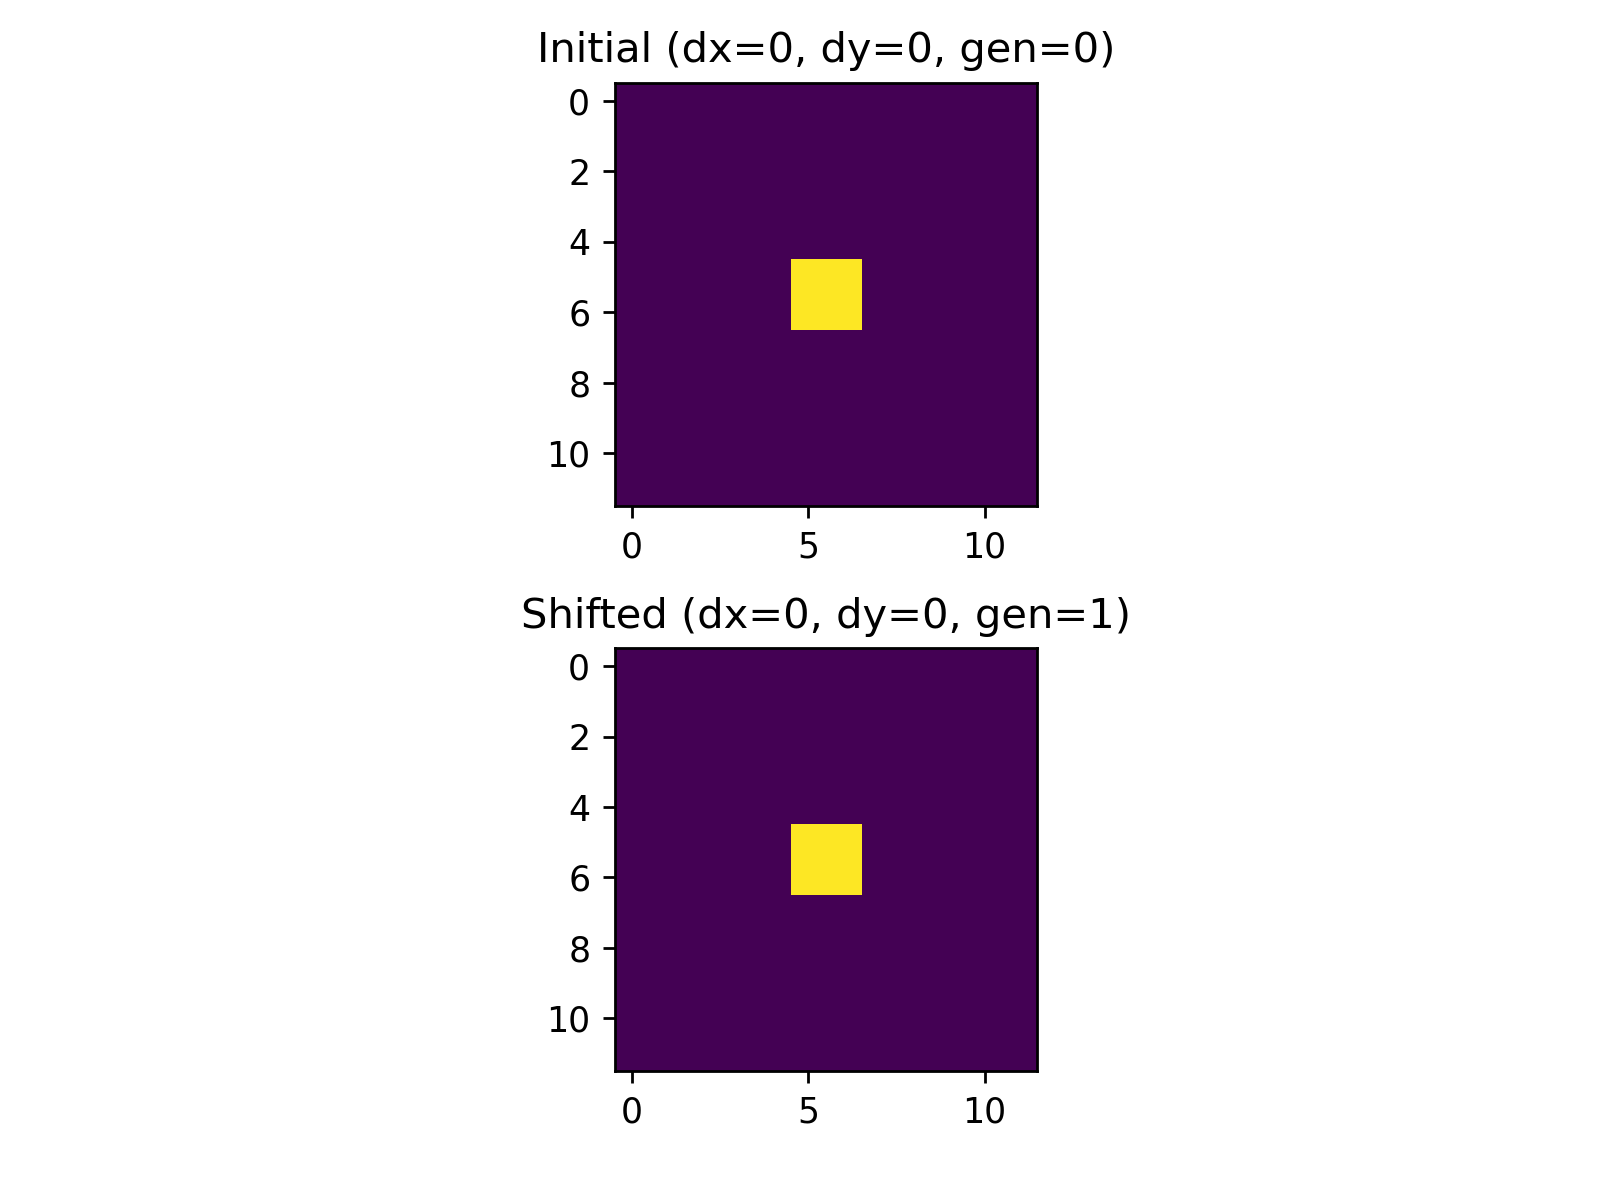

<IPython.core.display.Javascript object>


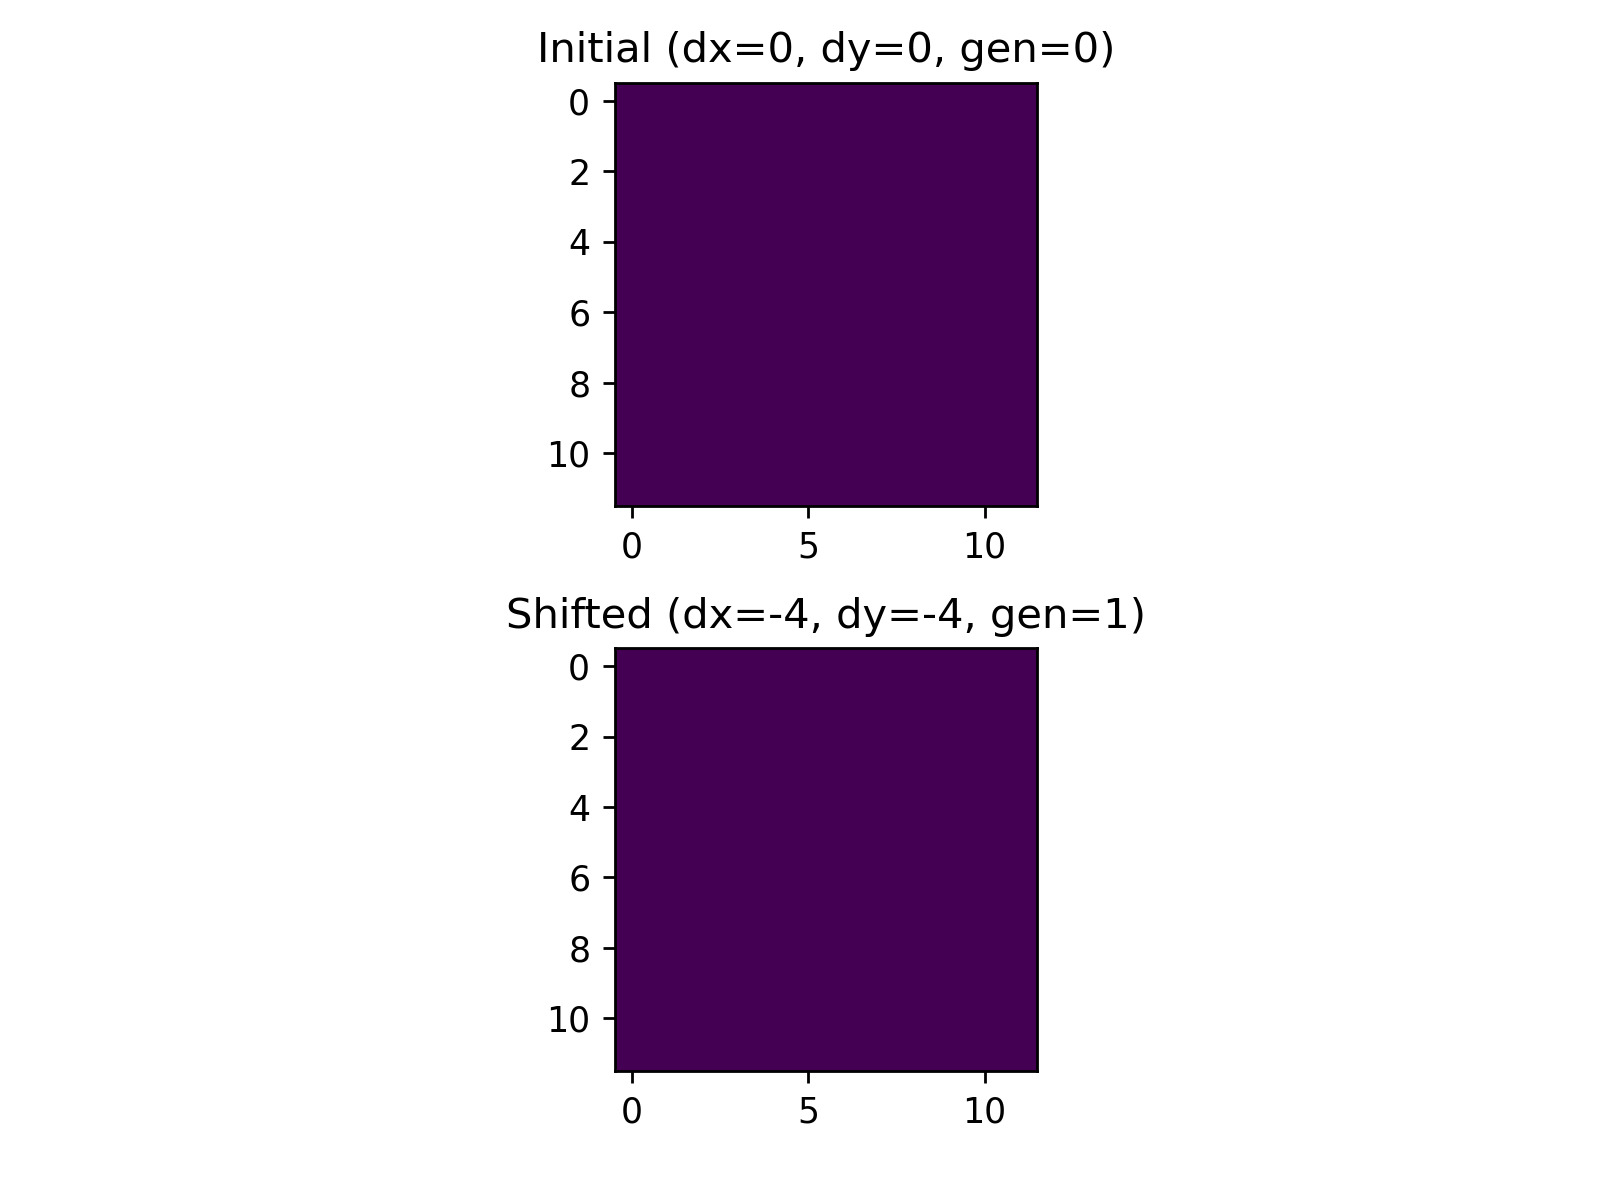

<IPython.core.display.Javascript object>


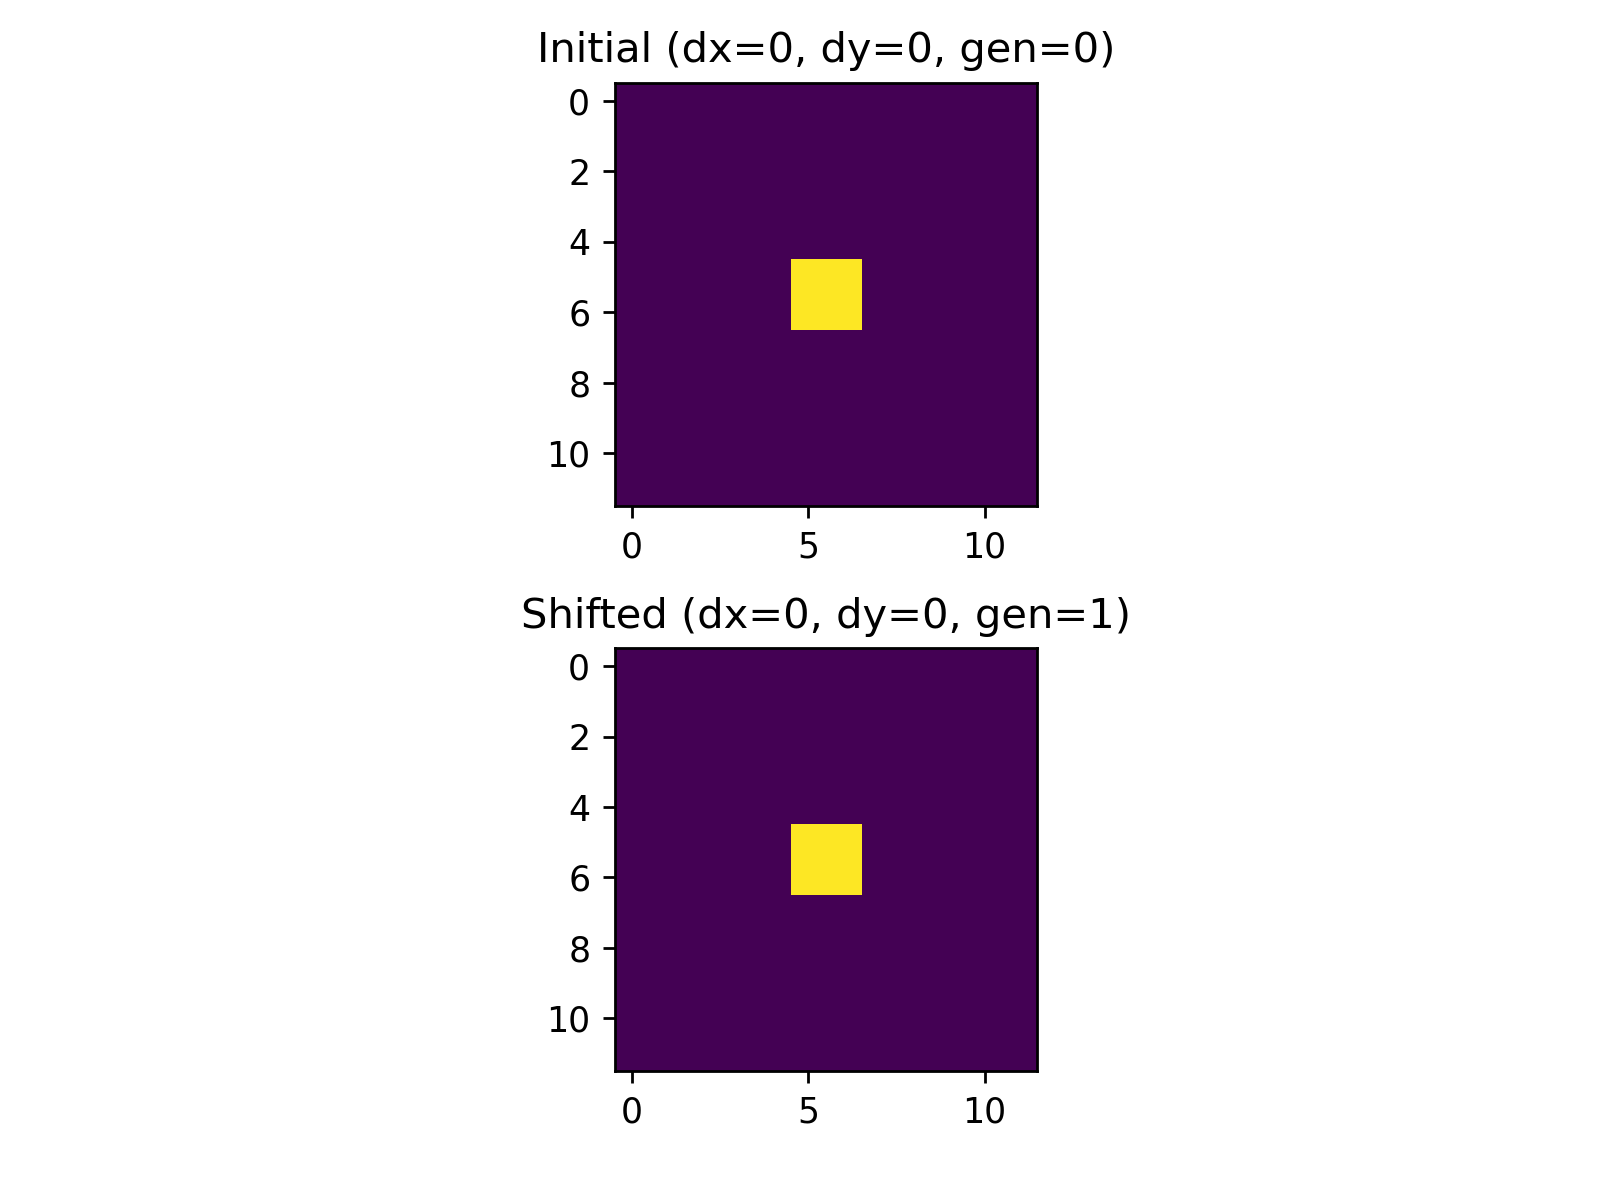

<IPython.core.display.Javascript object>


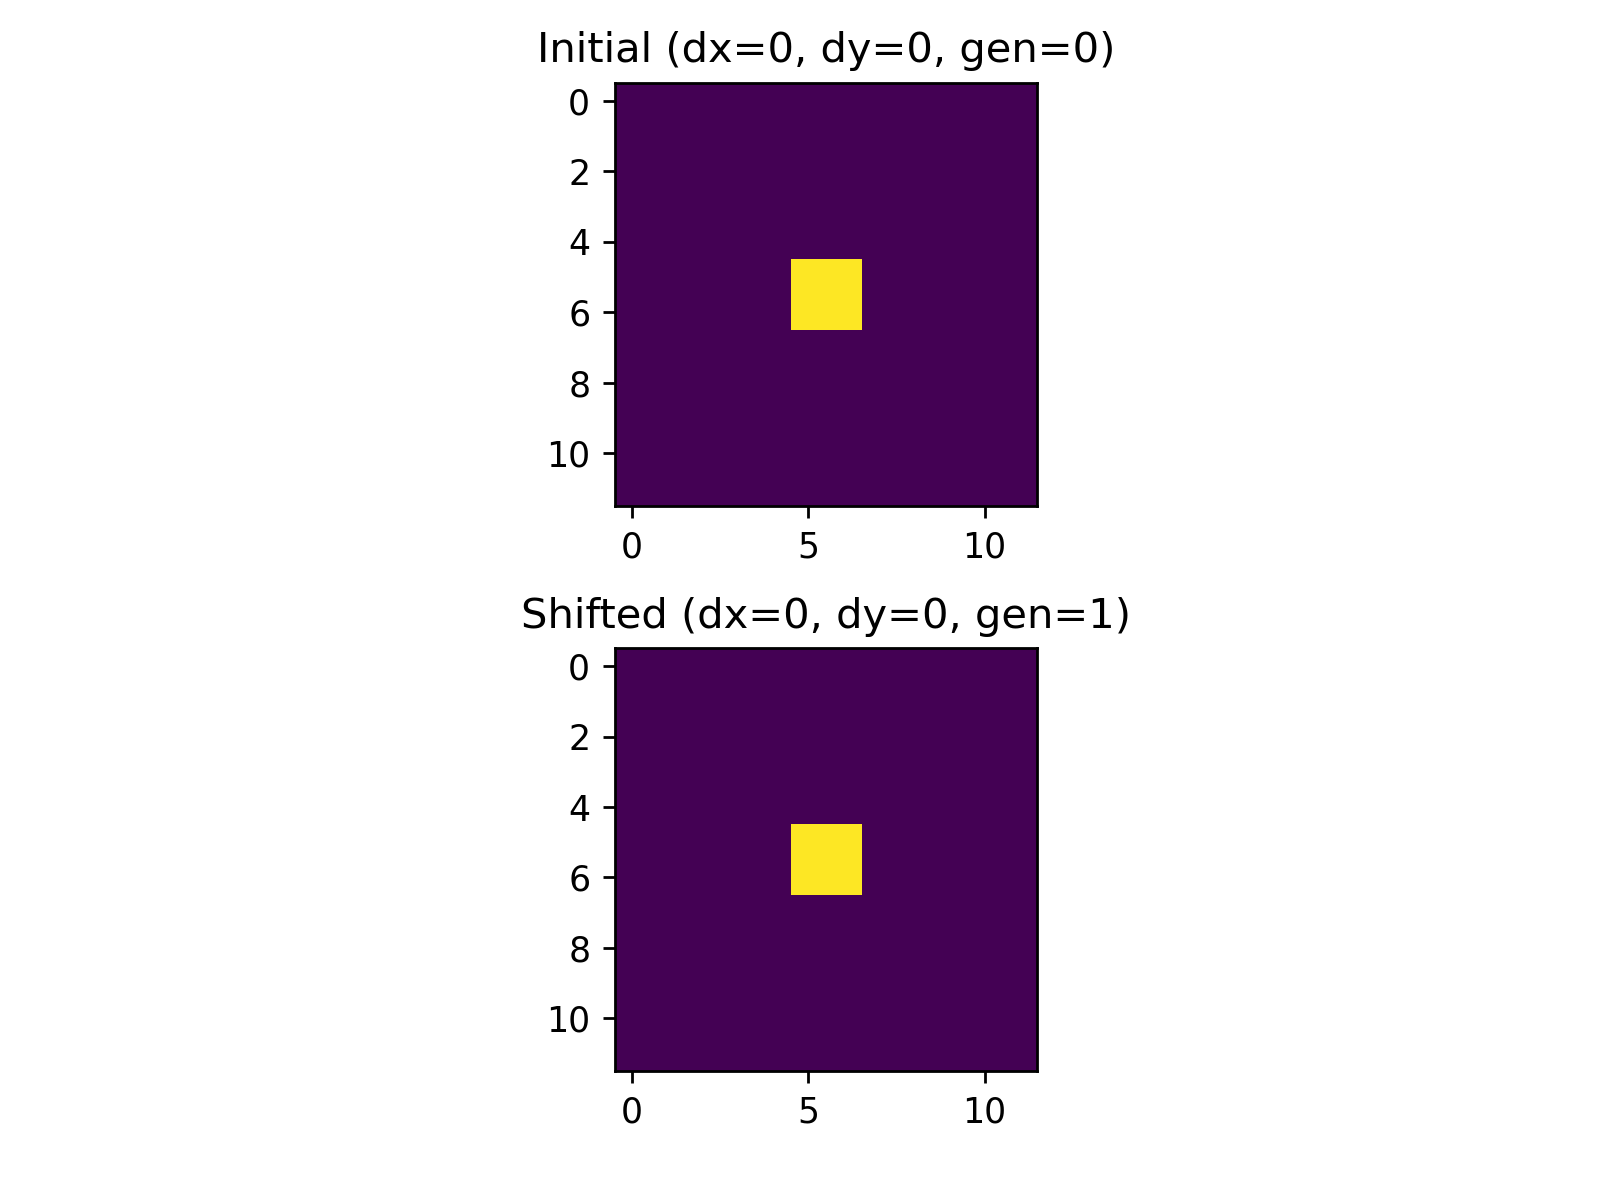

<IPython.core.display.Javascript object>


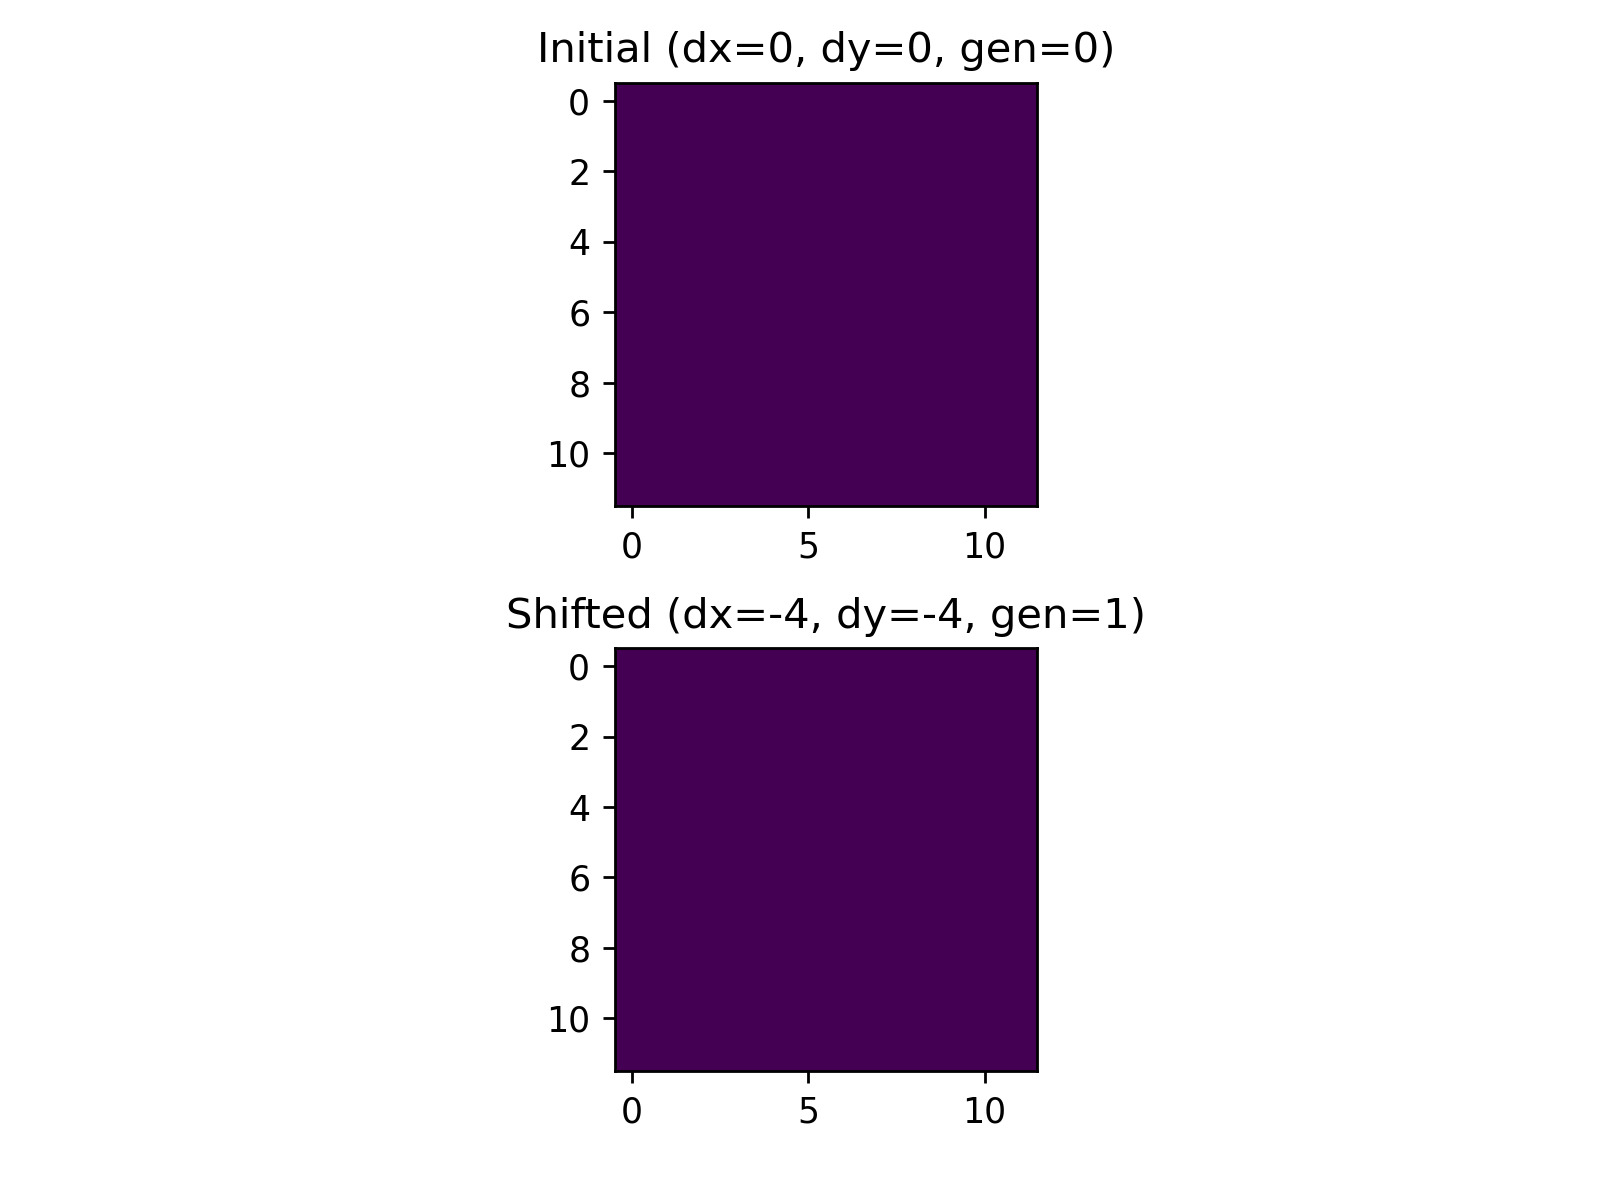

<IPython.core.display.Javascript object>


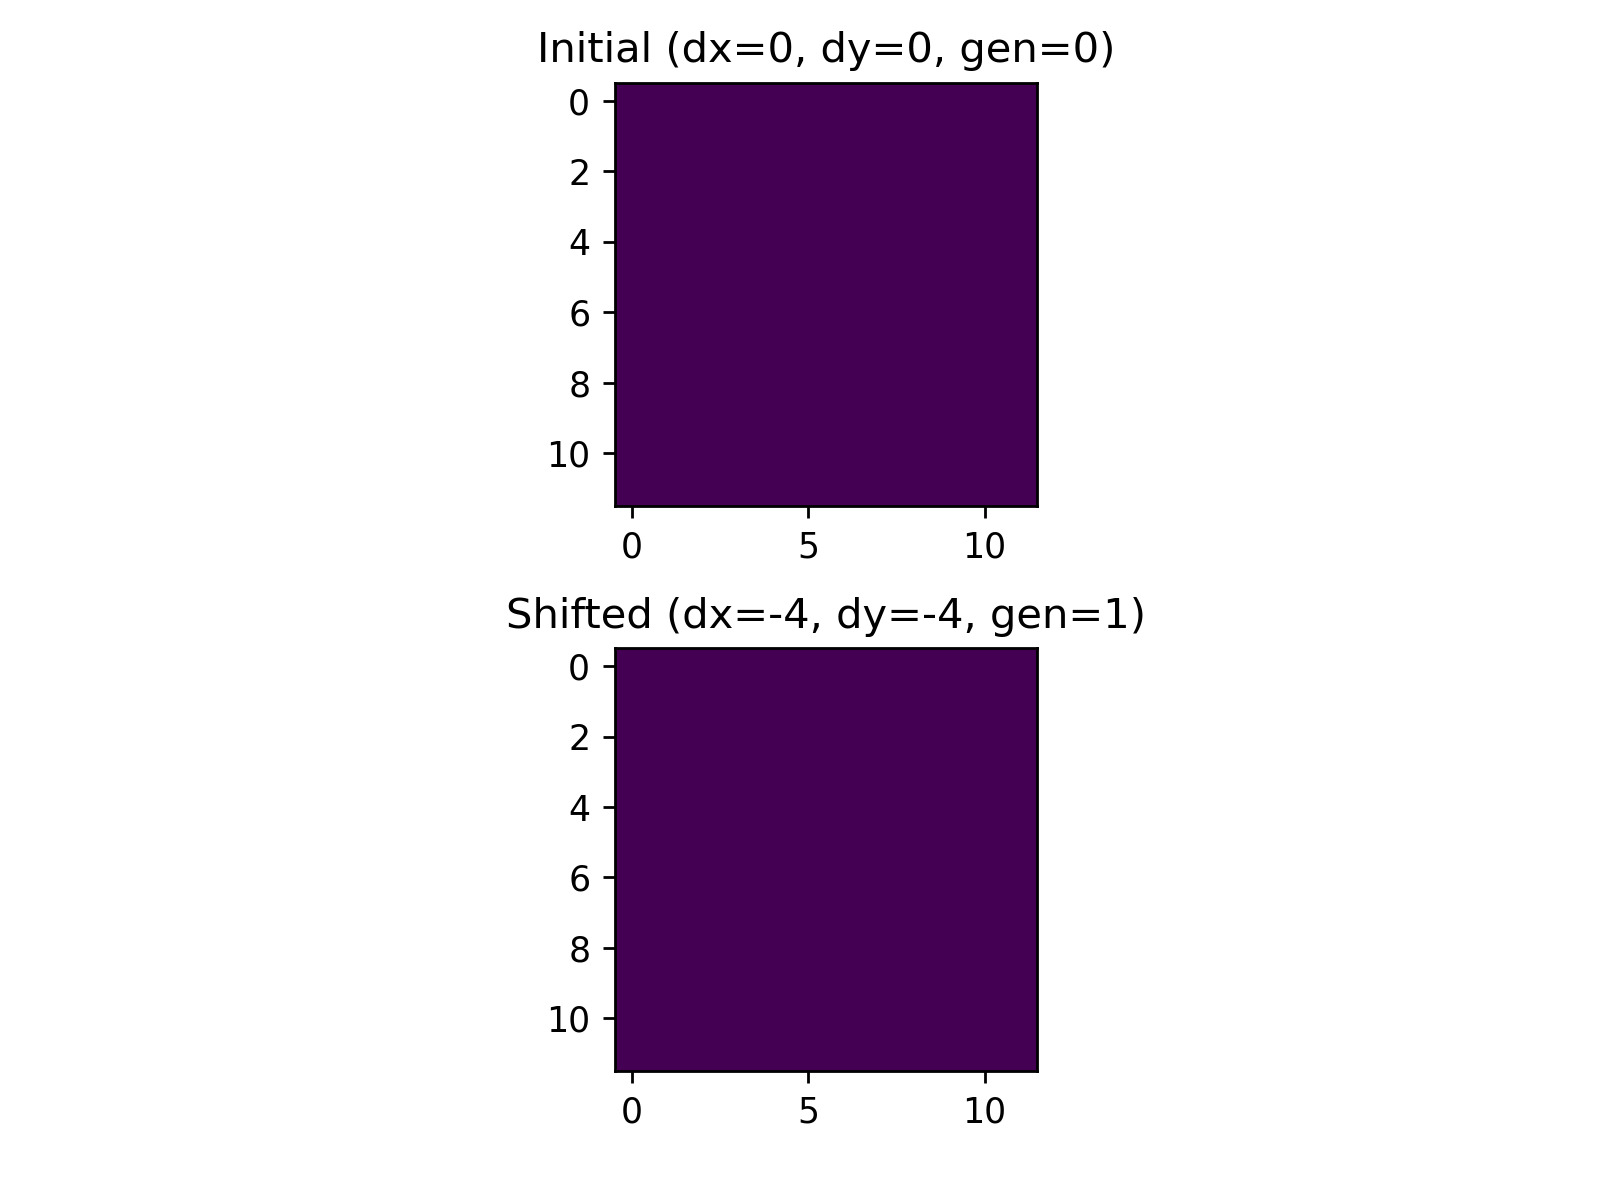

<IPython.core.display.Javascript object>


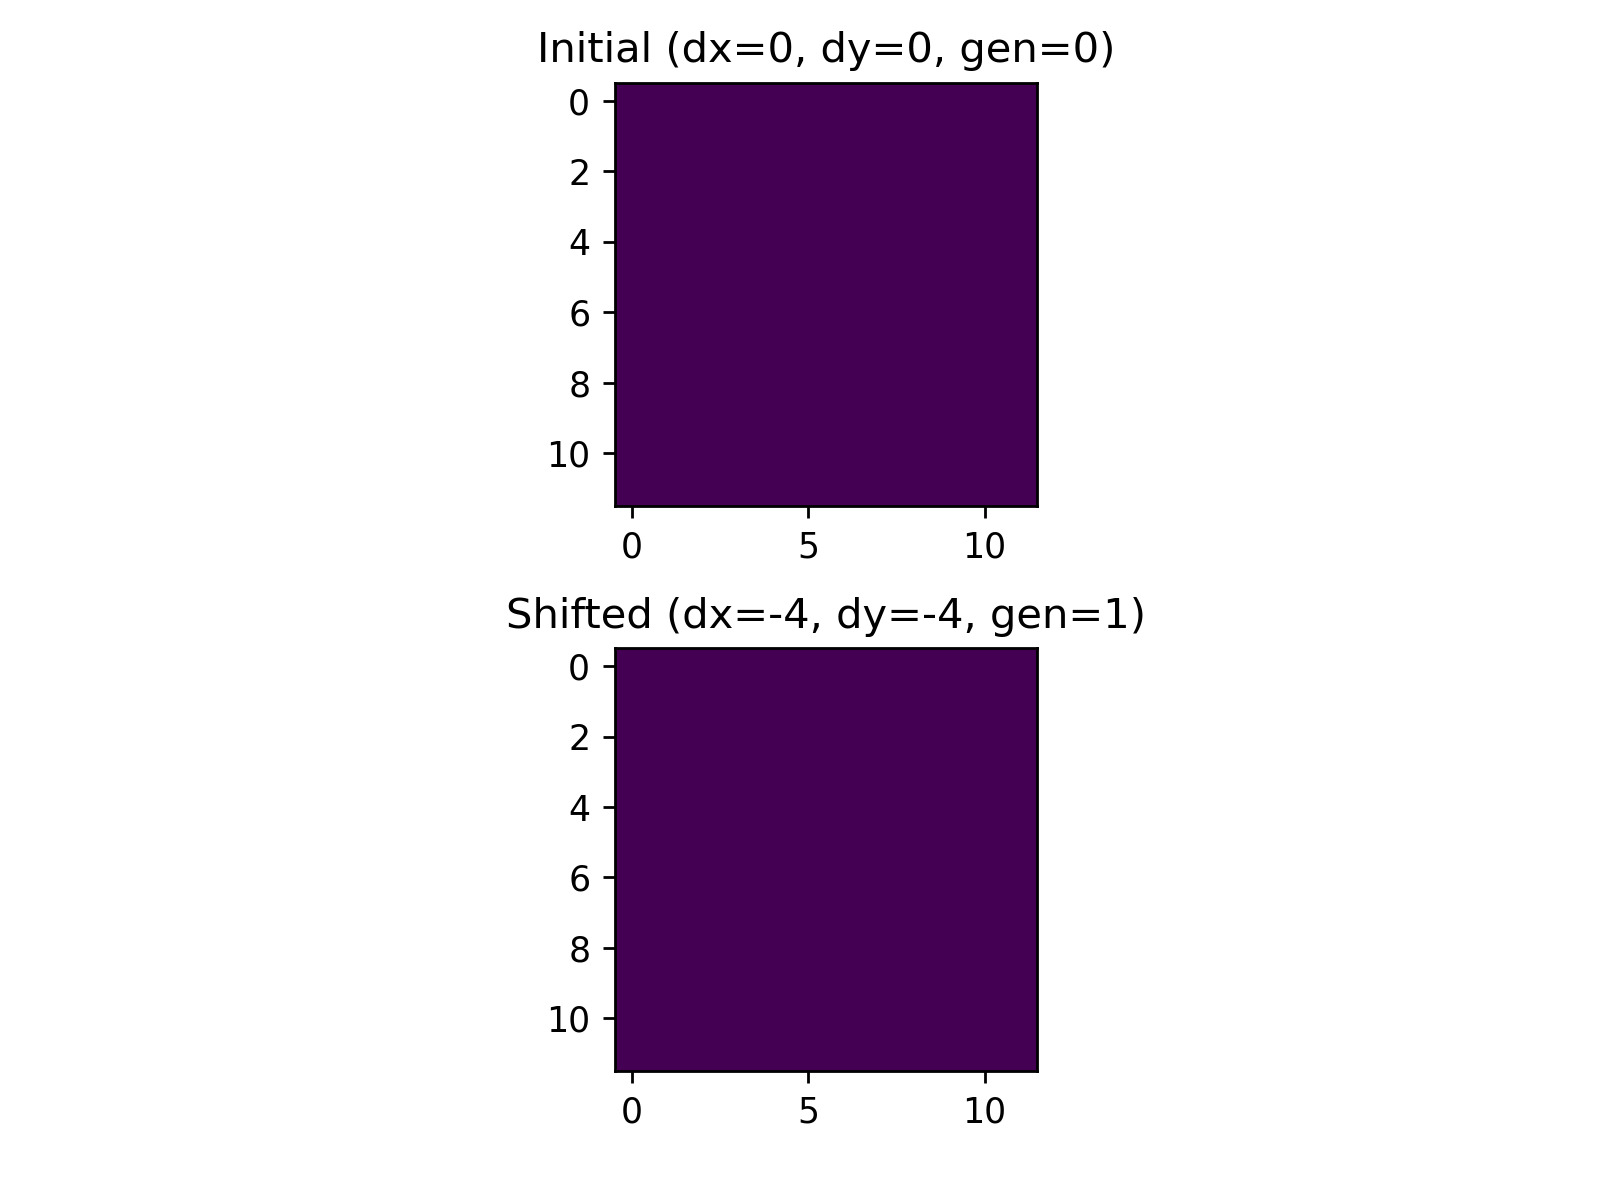

<IPython.core.display.Javascript object>


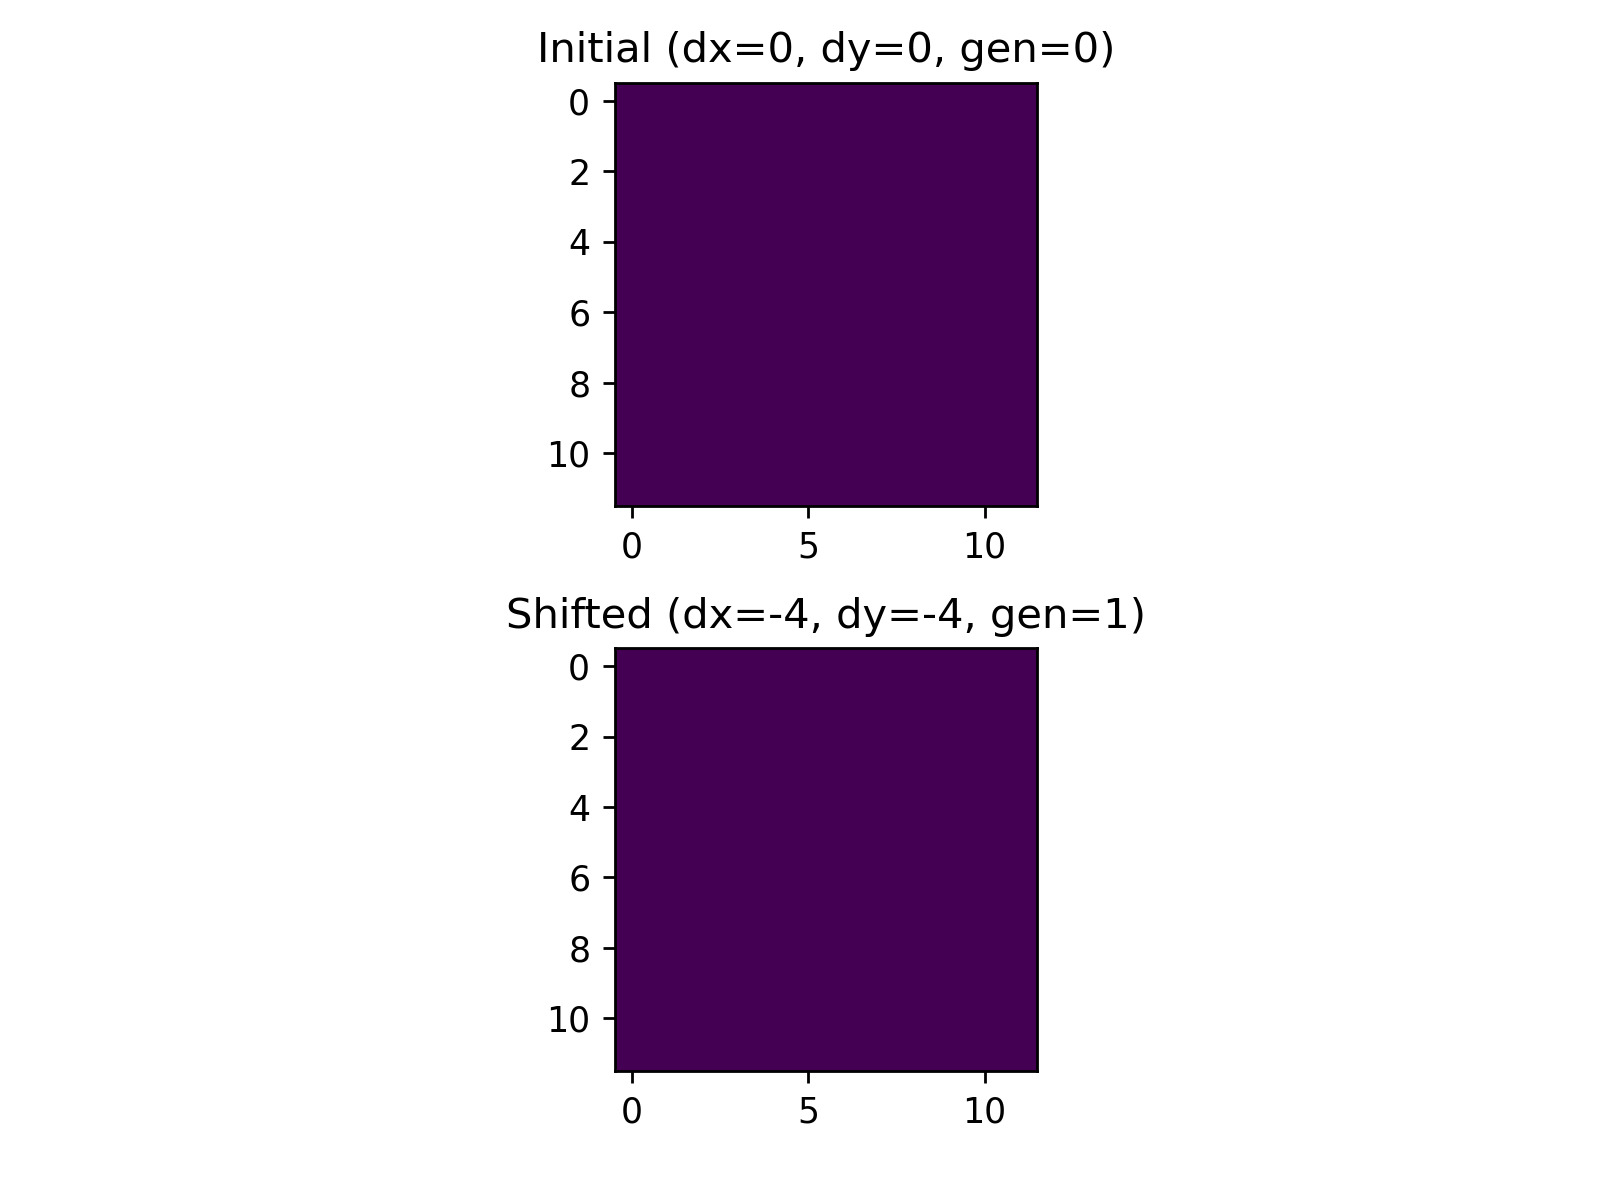

In [40]:
n_tries = 100
config_size = 4, 4
max_gen = 4

found_patterns = []
for t in range(n_tries):
    found_info = find_pattern_in_grid(rng, config_size, max_gen)
    if found_info:
        found_patterns.append(found_info)
        
        
if len(found_patterns) == 0:
    print("No pattern found")
else:
    for gen, shift, config, initial_grid, grid in found_patterns:
        fig, (ax1, ax2) = plt.subplots(2, 1)
        fig.tight_layout(pad=2)

        ax1.imshow(initial_grid)
        ax1.set_title("Initial (dx=0, dy=0, gen=0)")
        ax2.imshow(grid)
        ax2.set_title(f"Shifted (dx={shift[1]}, dy={shift[0]}, gen={gen})")